# Sentiment Analysis NLTK
Taken from here: http://www.nltk.org/howto/sentiment.html

In [1]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

(100, 100)

Each document is represented by a tuple (sentence, label). The sentence is tokenized, so it is represented by a list of strings:

In [3]:
subj_docs[0]

(['smart',
  'and',
  'alert',
  ',',
  'thirteen',
  'conversations',
  'about',
  'one',
  'thing',
  'is',
  'a',
  'small',
  'gem',
  '.'],
 'subj')

We separately split subjective and objective instances to keep a balanced uniform class distribution in both train and test sets.

In [4]:
train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs

In [5]:
sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

We use simple unigram word features, handling negation:

In [10]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
print("Ungram Feats Length is: {}".format(len(unigram_feats)))
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

Ungram Feats Length is: 83


We apply features to obtain a feature-value representation of our datasets:

In [11]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

We can now train our classifier on the training set, and subsequently output the evaluation results:

In [14]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
print('------------Print the Results--------------')
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

Training classifier
------------Print the Results--------------
Evaluating NaiveBayesClassifier results...
Accuracy: 0.8
F-measure [obj]: 0.8
F-measure [subj]: 0.8
Precision [obj]: 0.8
Precision [subj]: 0.8
Recall [obj]: 0.8
Recall [subj]: 0.8


# Sentiment Insensity

## Setup Some Fake Data

In [16]:
sentences = ["VADER is smart, handsome, and funny.", # positive sentence example
...    "VADER is smart, handsome, and funny!", # punctuation emphasis handled correctly (sentiment intensity adjusted)
...    "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
...    "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
...    "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
...    "VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!",# booster words & punctuation make this close to ceiling for score
...    "The book was good.",         # positive sentence
...    "The book was kind of good.", # qualified positive sentence is handled correctly (intensity adjusted)
...    "The plot was good, but the characters are uncompelling and the dialog is not great.", # mixed negation sentence
...    "A really bad, horrible book.",       # negative sentence with booster words
...    "At least it isn't a horrible book.", # negated negative sentence with contraction
...    ":) and :D",     # emoticons handled
...    "",              # an empty string is correctly handled
...    "Today sux",     #  negative slang handled
...    "Today sux!",    #  negative slang with punctuation emphasis handled
...    "Today SUX!",    #  negative slang with capitalization emphasis
...    "Today kinda sux! But I'll get by, lol" # mixed sentiment example with slang and constrastive conjunction "but"
... ]

In [17]:
paragraph = "It was one of the worst movies I've seen, despite good reviews. \
... Unbelievably bad acting!! Poor direction. VERY poor production. \
... The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!"

In [22]:
tricky_sentences = [
...    "Most automated sentiment analysis tools are shit.",
...    "VADER sentiment analysis is the shit.",
...    "Sentiment analysis has never been good.",
...    "Sentiment analysis with VADER has never been this good.",
...    "Warren Beatty has never been so entertaining.",
...    "I won't say that the movie is astounding and I wouldn't claim that \
...    the movie is too banal either.",
...    "I like to hate Michael Bay films, but I couldn't fault this one",
...    "It's one thing to watch an Uwe Boll film, but another thing entirely \
...    to pay for it",
...    "The movie was too good",
...    "This movie was actually neither that funny, nor super witty.",
...    "This movie doesn't care about cleverness, wit or any other kind of \
...    intelligent humor.",
...    "Those who find ugly meanings in beautiful things are corrupt without \
...    being charming.",
...    "There are slow and repetitive parts, BUT it has just enough spice to \
...    keep it interesting.",
...    "The script is not fantastic, but the acting is decent and the cinematography \
...    is EXCELLENT!",
...    "Roger Dodger is one of the most compelling variations on this theme.",
...    "Roger Dodger is one of the least compelling variations on this theme.",
...    "Roger Dodger is at least compelling as a variation on the theme.",
...    "they fall in love with the product",
...    "but then it breaks",
...    "usually around the time the 90 day warranty expires",
...    "the twin towers collapsed today",
...    "However, Mr. Carter solemnly argues, his client carried out the kidnapping \
...    under orders and in the ''least offensive way possible.''"
... ]

In [19]:
print(paragraph)

It was one of the worst movies I've seen, despite good reviews. Unbelievably bad acting!! Poor direction. VERY poor production. The movie was bad. Very bad movie. VERY bad movie. VERY BAD movie. VERY BAD movie!


### Tokenize Data

In [20]:
from nltk import tokenize
lines_list = tokenize.sent_tokenize(paragraph)
sentences.extend(lines_list)

In [24]:
lines_list

["It was one of the worst movies I've seen, despite good reviews.",
 'Unbelievably bad acting!!',
 'Poor direction.',
 'VERY poor production.',
 'The movie was bad.',
 'Very bad movie.',
 'VERY bad movie.',
 'VERY BAD movie.',
 'VERY BAD movie!']

In [25]:
sentences.extend(lines_list)

In [26]:
sentences.extend(tricky_sentences)

In [27]:
sid = SentimentIntensityAnalyzer()

In [28]:
for sentence in sentences:
...     print(sentence)
...     ss = sid.polarity_scores(sentence)
...     for k in sorted(ss):
...         print('{0}: {1}, '.format(k, ss[k]), end='')
...     print()

VADER is smart, handsome, and funny.
compound: 0.8316, neg: 0.0, neu: 0.254, pos: 0.746, 
VADER is smart, handsome, and funny!
compound: 0.8439, neg: 0.0, neu: 0.248, pos: 0.752, 
VADER is very smart, handsome, and funny.
compound: 0.8545, neg: 0.0, neu: 0.299, pos: 0.701, 
VADER is VERY SMART, handsome, and FUNNY.
compound: 0.9227, neg: 0.0, neu: 0.246, pos: 0.754, 
VADER is VERY SMART, handsome, and FUNNY!!!
compound: 0.9342, neg: 0.0, neu: 0.233, pos: 0.767, 
VADER is VERY SMART, really handsome, and INCREDIBLY FUNNY!!!
compound: 0.9469, neg: 0.0, neu: 0.294, pos: 0.706, 
The book was good.
compound: 0.4404, neg: 0.0, neu: 0.508, pos: 0.492, 
The book was kind of good.
compound: 0.3832, neg: 0.0, neu: 0.657, pos: 0.343, 
The plot was good, but the characters are uncompelling and the dialog is not great.
compound: -0.7042, neg: 0.327, neu: 0.579, pos: 0.094, 
A really bad, horrible book.
compound: -0.8211, neg: 0.791, neu: 0.209, pos: 0.0, 
At least it isn't a horrible book.
compound

# Sentiment Analysis of Basketball Game Comments

In [33]:
import pandas as pd
df = pd.read_csv('CollegeBasketballReddit.csv',
                 index_col=0,
                 names=['CommentID','Depth','Submission','Username','TeamFlair','Score','Body'])

In [34]:
df.head()

Depth                                         Submission  \
CommentID                                                              
t1_df5posm      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pf7q      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pfed      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pg9f      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pfrm      0  [Post Game Thread] #7 South Carolina defeats #...   

                      Username      TeamFlair  Score  \
CommentID                                              
t1_df5posm              Addyct         Luhvul      1   
t1_df5pf7q              btr154       NO FLAIR   2892   
t1_df5pfed           NO AUTHOR       NO FLAIR   3075   
t1_df5pg9f            apiffany  Dayton Flyers   2572   
t1_df5pfrm  raptorsbucketnator   Oregon Ducks   1397   

                                                         Body  
CommentID                                                      
t1_df5posm  Hi /r/all. Please keep this thread civil. [The...  
t1_df5pf7q  65 points in the second half for South Carolin...  
t1_df5pfed                                          [deleted]  
t1_df5pg9f                    http://i.imgur.com/WpKhtQO.gifv  
t1_df5pfrm  I have no clue what the South Carolina coach t...

## Pull out just the coments as a list

In [44]:
comments_list = df.Body.tolist()

In [50]:
comments_list[500]

"I don't hate Duke  but I'm so glad Grayson Allen is out of the tournament."

In [52]:
sid = SentimentIntensityAnalyzer()
for comment in comments_list:
    print(comment)
    ss = sid.polarity_scores(comment)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

Hi /r/all. Please keep this thread civil. [The Rules](https://www.reddit.com/r/CollegeBasketball/about/rules/) will be enforced heavily. Please enjoy the Madness  but enjoy responsibly.
compound: 0.775, 
neg: 0.073, 
neu: 0.563, 
pos: 0.364, 
65 points in the second half for South Carolina after 23 points in the first half. Just wow. 
compound: 0.5859, 
neg: 0.0, 
neu: 0.817, 
pos: 0.183, 
[deleted]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
http://i.imgur.com/WpKhtQO.gifv
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I have no clue what the South Carolina coach told his guys at the half  but whatever it was seemed to give birth to a non-stop energy offensive juggernaut.   For a seemingly uneventful round of 64 upset wise  the round of 32 was everything fans of chaos could of hoped for.
compound: -0.5927, 
neg: 0.215, 
neu: 0.628, 
pos: 0.156, 
Thanks Wisconsin  you've just paved a road for Duke to get to the Final Four 
compound: 0.4404, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 


neu: 1.0, 
pos: 0.0, 
2016: South Carolina lowers the Confederate battle flag  2017: Gamecocks beat Duke to make their first Sweet 16  Take note  Mississippi.
compound: -0.0258, 
neg: 0.163, 
neu: 0.717, 
pos: 0.12, 
Good for South Carolina and Thornwell. The SEC should really start getting a little more respect. USC  Florida  and Kentucky in the Sweet 16. Plus Arkansas giving UNC hell  and Vandy certainly played well against Northwestern. It's not just Kentucky and Florida anymore.
compound: 0.8937, 
neg: 0.081, 
neu: 0.597, 
pos: 0.322, 
WHERE WERE U WEN DUKE IS KILL
compound: -0.6908, 
neg: 0.485, 
neu: 0.515, 
pos: 0.0, 
[MRW](http://a.fod4.com/misc/swansonsmile1.gif)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Carolinas UNITE!!!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
http://www.diddukewin.com
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
But McCrory says I don't have to pee next to the transgenders  so who's the real winner here?? 
compound: 0.6322, 
neg: 0.0, 

neg: 0.0, 
neu: 0.723, 
pos: 0.277, 
Meme magic is real
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Fuck you John Curry. Fuck you forever with a rusty spork.
compound: -0.7906, 
neg: 0.467, 
neu: 0.533, 
pos: 0.0, 
Given the talent and preseason hype surrounding this team... Biggest Choke Ever?
compound: -0.1779, 
neg: 0.215, 
neu: 0.613, 
pos: 0.172, 
Good for SC.  If the refs hadn't stepped in UNC would have suffered the same fate.
compound: -0.0772, 
neg: 0.159, 
neu: 0.697, 
pos: 0.144, 
Good job Frank. Miss you :(
compound: -0.1531, 
neg: 0.433, 
neu: 0.288, 
pos: 0.279, 
Does anyone know where i can find the full game online?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Thank you so much Amile and Matt for your wonderful years at Duke. You leave as champions and what you did can't be replicated. Love this team. Maybe the most up and down season I can remember  but what a great bunch of guys. Go Duke.
compound: 0.8647, 
neg: 0.062, 
neu: 0.714, 
pos: 0.224, 
THERE'LL BE A

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
March madness and stuff.
compound: -0.4404, 
neg: 0.492, 
neu: 0.508, 
pos: 0.0, 
Anybody have a link to the full game or even the final 3 minutes?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
B-b-but we've only got 7 guys!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
PATH TO THE FINAL FOUR JUST OPENED BUT A DAMN GATOR IS WORRYING ME 
compound: -0.7684, 
neg: 0.377, 
neu: 0.623, 
pos: 0.0, 
South Carolina will always have a little piece of my heart
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Where the fuck are the Grayson Allen memes? 
compound: -0.5423, 
neg: 0.333, 
neu: 0.667, 
pos: 0.0, 
I always wonder why no one has ever had a perfect bracket. With millions and millions of people trying and random brackets being submitted  you'd think one  by this time would be perfect. Then games like this and Villanova happen and I'm reminded  "oh  right  madness himself controls march." God damn sheogorath. 
compound: 0.6369, 
neg: 

SC beat Duke so bad  they stole their seed on that graphic
compound: -0.6696, 
neg: 0.29, 
neu: 0.71, 
pos: 0.0, 
Bruce Weber is getting it done at K-state too guys 😂😂😂😂
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Baylor might actually make a final 4 now
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Duke should have been a 1 seed.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Where do I sign up for the South Carolina Bandwagon?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
ALL HAIL TEAM CHAOS
compound: -0.5267, 
neg: 0.529, 
neu: 0.286, 
pos: 0.186, 
Chaos reigns supreme
compound: -0.0258, 
neg: 0.446, 
neu: 0.12, 
pos: 0.434, 
Holy shit what did we do to deserve this round of 32
compound: -0.5574, 
neg: 0.247, 
neu: 0.753, 
pos: 0.0, 
Now K-State has 3 former coaches make the sweet 16.
compound: 0.4588, 
neg: 0.0, 
neu: 0.727, 
pos: 0.273, 
Lol anyone see South Carolina as a 2 seed
compound: 0.4215, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
...WE ARE?  ...SC?
compound: 0.0, 

pos: 0.0, 
I guess Obama's bracket is >50% busted
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
We were the last team to beat South Carolina. So all I hear is we basically beat Duke.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
THEY WANT CUSE!
compound: 0.1511, 
neg: 0.0, 
neu: 0.557, 
pos: 0.443, 
Duke's problem was that they didn't wear one of those Nike "TEAM NAME MENTALITY" shooting shirts. 
compound: -0.4019, 
neg: 0.153, 
neu: 0.847, 
pos: 0.0, 
love that new Duke flair!
compound: 0.6696, 
neg: 0.0, 
neu: 0.471, 
pos: 0.529, 
Huh... 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
i got baylor vs usc next week. that's bout all i got in tact 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
http://www.diddukewin.com
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
http://i.imgur.com/Ac46p5U.jpg 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That was the first time I've ever seen Frank Martin show any emotion other than those which lead to high blood pressure.
compound: 

neu: 0.681, 
pos: 0.178, 
Lol at the UNC fans trying to live vicariously through South Carolina. Is this the best you can do? Talk shit after squeaking by Arkansas? We own you. Your team is shit and your coach is shit.   Also  GG Cocks. That was a brilliant piece of coaching by frank Martin. It's almost as if he pulled the rug out from under us in the second half. Trickster ass shit. Good luck in the tourney. I'll be pulling for you guys!  Edit: I'll wear these downvotes with pride during the offseason. When the NCAA hands out its verdict and the UNC lawsuits ensue I'll be sure to donate an extra $100 to the Iron Dukes on Kevin Knox's behalf. 
compound: 0.6352, 
neg: 0.144, 
neu: 0.678, 
pos: 0.178, 
Duke played like shit and all  but the refs all tournament have been dog shit... They call a foul if you breathe on someone.  4 players should not be fouling out in 1 game   they gotta change it from 5 to 6 fouls or hire new refs smh
compound: -0.128, 
neg: 0.085, 
neu: 0.841, 
pos: 0.074,

neg: 0.444, 
neu: 0.556, 
pos: 0.0, 
He probably just threatened to rip their heads off because Frank Martin is a bad mother fucker.
compound: -0.8957, 
neg: 0.454, 
neu: 0.546, 
pos: 0.0, 
Remember that time we had Frank Martin  but our AD chased him off?  Yeah.... 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Cocaine's on me if we win boys. Little do they know coach is gonna be covered in a powdery substance by nights end.
compound: 0.5859, 
neg: 0.0, 
neu: 0.847, 
pos: 0.153, 
Given what I know about Frank Martin  I'm assuming he brought his beloved golden retriever into the locker room and shot it.  Then told the team "I *loved* that dog.  I don't even like you.  So what do you think I'll do if you let me down?"
compound: 0.2937, 
neg: 0.044, 
neu: 0.888, 
pos: 0.068, 
Still salty about URI tbh
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
They've now scored 54 & 65 in the two *second halves!!* What the hell goes on in that locker room? 
compound: -0.7339, 
neg: 0.224, 
neu:

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
We'll take it from here 👀
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Dibs?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
If only we could have won to make things even more ludicrous 
compound: 0.228, 
neg: 0.169, 
neu: 0.606, 
pos: 0.224, 
What has the world come to
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
With a week to spare. Well done  Roney.
compound: 0.2732, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
The Prophet. Praise be.
compound: 0.5574, 
neg: 0.0, 
neu: 0.455, 
pos: 0.545, 
Should've called the Elite 8 boiiiiiii
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It was written.  The prophecy is true.
compound: 0.4215, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
Next time  call a national title.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Dang 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Nice work!
compound: 0.4753, 
neg: 0.0, 
neu: 0.244, 
pos: 0.756, 
WHAT DOES MY FUTURE HOLD MR PROGNOSTICATOR?
compound: 0.0, 
ne

WE ARE ALL CAROLINA ON THIS BLESSED DAY
compound: 0.5994, 
neg: 0.0, 
neu: 0.642, 
pos: 0.358, 
The middle-aged UNC fan with the Gamecock towel was honestly the highlight of the game for me.
compound: 0.7717, 
neg: 0.0, 
neu: 0.645, 
pos: 0.355, 
UNC IS THE ONLY ACC TEAM THAT MATTERS
compound: 0.0258, 
neg: 0.0, 
neu: 0.864, 
pos: 0.136, 
We cool now.
compound: 0.3182, 
neg: 0.0, 
neu: 0.465, 
pos: 0.535, 
WE WERE A COLLEGE BEFORE THEY WERE A STATE
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Ily
compound: 0.6597, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
No argument here
compound: -0.5719, 
neg: 0.825, 
neu: 0.175, 
pos: 0.0, 
=( 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'm cool with it
compound: 0.3182, 
neg: 0.0, 
neu: 0.566, 
pos: 0.434, 
^ This guy gets it. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
As a Clemson fan  go Gamecocks...and here's to hoping you are next to go  UNC
compound: 0.6249, 
neg: 0.0, 
neu: 0.702, 
pos: 0.298, 
ACC in March: GIVE ME SOME BEER TO FOR

pos: 0.0, 
Not enough salt to represent this thread. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
[More like...](http://i.imgur.com/FkVUrcD.jpg)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Very accurate
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Why did you post a picture of grayson allen?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
You guys make this place toxic.  Our threads are the most uncivil game threads on this sub. They're unbearable. **All of them  not just when we lose.** It's not because of us  we're active in other game threads. You all come into our threads and put your red hats on to throw as much hate as you can. Ctrl+F "fuck" in our game thread versus other game threads of the day. ...  USC played a hell of a game  they deserved the W for sure.  Edit: in other words  it's clear whose throwing salt. Every time we play.
compound: 0.2732, 
neg: 0.076, 
neu: 0.81, 
pos: 0.114, 
And a Blue Devil dies
compound: -0.6597, 
neg: 0.595, 
neu: 0.405, 
pos: 0.0

neu: 1.0, 
pos: 0.0, 
I had a great date tonight  Louisville lost  Duke lost  Kentucky won... It was a terrific day.
compound: 0.5574, 
neg: 0.211, 
neu: 0.459, 
pos: 0.33, 
Well they did mostly until March tbf.
compound: 0.2732, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
In the chance that you teach one of my classes  I'll settle for a free A!
compound: 0.68, 
neg: 0.0, 
neu: 0.699, 
pos: 0.301, 
We're the type of team that can beat literally anybody (Duke) or we can shit the bed and lose to a scrub team. In the Elite 8  we would have to face Wisconsin or Florida. None of the 3 teams we're going to have to face are as talented as Duke (at least until the final 4).  
compound: -0.4588, 
neg: 0.104, 
neu: 0.842, 
pos: 0.054, 
What the fuckkk
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I think it was more of a mutual parting.  I remember hearing that Frank and the AD weren't seeing eye to eye on some things.  
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Iirc it was because he was ye

neg: 0.143, 
neu: 0.683, 
pos: 0.174, 
The crowd was the least of our problems tonight though. We probably would've lost on any court playing like we did. 
compound: -0.1779, 
neg: 0.19, 
neu: 0.646, 
pos: 0.163, 
Man you guys almost beat UK in the tourney  and you very well could have ended up in the ncaa championship  and I bet you'd have done similar things as SC. Woulda shoulda coulda I know. But your not a bad team. 
compound: 0.7988, 
neg: 0.0, 
neu: 0.816, 
pos: 0.184, 
Still trying to figure out how a 2 seed had to play a road game in its second game
compound: 0.34, 
neg: 0.0, 
neu: 0.862, 
pos: 0.138, 
You don't know much about college basketball do you?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
True  only two of Duke's top scorers fouled out. If the refs didn't favor Duke  the whole team woulda been slapped with a collective double-technical and literally fed to wolves.   Damn refs  always rigging the games and starving our wolves. 
compound: -0.4867, 
neg: 0.167, 
neu

compound: 0.2732, 
neg: 0.142, 
neu: 0.619, 
pos: 0.239, 
http://www.diddukewin.com/
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
B1G if true
compound: 0.4215, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
BAMA LOST TO CLEMSON IN THE LAST SECOND! 
compound: -0.3802, 
neg: 0.27, 
neu: 0.73, 
pos: 0.0, 
And here I thought I'd never see eye to eye with a USC man on anything.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It's averaging more than 100 upvotes per minute. We'll be on /r/all in no time.  e: It took 12 minutes to hit the front page of /r/all. Good job  everyone.
compound: 0.1779, 
neg: 0.066, 
neu: 0.846, 
pos: 0.088, 
It's inevitable...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
halp
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
lmao stop it. 
compound: 0.4019, 
neg: 0.31, 
neu: 0.141, 
pos: 0.549, 
Because the Kentucky thread didn't hit the front page of /r/all in less than fifteen minutes.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Never ceases to amaze me how 

pos: 0.0, 
That's a Jayhawk irl.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I was unsure for much longer than a person should be. 
compound: -0.25, 
neg: 0.2, 
neu: 0.8, 
pos: 0.0, 
Is it... is it not?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Pieces in place man.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Aren't your football cocks small as hell?
compound: -0.6808, 
neg: 0.434, 
neu: 0.566, 
pos: 0.0, 
No  Roger. We basketball school now.
compound: -0.296, 
neg: 0.306, 
neu: 0.694, 
pos: 0.0, 
What a time to be alive.
compound: 0.3818, 
neg: 0.0, 
neu: 0.606, 
pos: 0.394, 
HAHAHAJAJJAJJAHAHAHAHAHAHAHAHHAHAHHAAHHAHAHA THAT'S HILARIOUS
compound: 0.4019, 
neg: 0.0, 
neu: 0.426, 
pos: 0.574, 
>TFW it's not even in the top 10 of gayest things in your comment history
compound: 0.2023, 
neg: 0.0, 
neu: 0.886, 
pos: 0.114, 
Your phone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It is called a Brahma Chicken
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
He was super

neu: 0.803, 
pos: 0.05, 
Don't you mean the Starship Enterprises?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
http://i.imgur.com/JSJELYf.jpg
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'm fucking losing it at this. Also  as an Indy native who grew up five minutes from Butler  Friday will be a fun game.
compound: 0.1045, 
neg: 0.106, 
neu: 0.772, 
pos: 0.121, 
sick jpeg compression
compound: -0.5106, 
neg: 0.623, 
neu: 0.377, 
pos: 0.0, 
Same frendo
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
me too thanks
compound: 0.4404, 
neg: 0.0, 
neu: 0.408, 
pos: 0.592, 
Hey buddy hope everything gets better
compound: 0.7003, 
neg: 0.0, 
neu: 0.408, 
pos: 0.592, 
I think that's why these memes are so popular and funny because they hit home 
compound: 0.777, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
You're welcome to talk here if you need to
compound: 0.4588, 
neg: 0.0, 
neu: 0.727, 
pos: 0.273, 
It gets better my man. Stick with it. 
compound: 0.4404, 
neg: 0.0, 
neu: 0.707, 
pos: 0.2

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
There had to have been a briefing tonight. 4 different media outlets reporting he wants to stay. Holy shit. Mr Wenger's wild ride continues.   And I don't think yall are gonna get top 4  this year either.   Chelsea  Tottenham  Man City  Pool  Man Utd all vying for those  spots. Arsenal can't win a fucking match these days. Might not even make Europa. Interesting time for the club. 
compound: -0.4891, 
neg: 0.096, 
neu: 0.838, 
pos: 0.065, 
But for real. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I hear a certain tinkerer is available...
compound: 0.2732, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
BOY HE DELETED HIS ACCOUNT LOL 
compound: 0.4215, 
neg: 0.0, 
neu: 0.641, 
pos: 0.359, 
Uggggggggghhhhh
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
>I can't believe Duke is going to be the ONLY ACC team to make the sweet 16 LOL  UNC was down a couple points with like 10 minutes left.
compound: 0.8415, 
neg: 0.0, 
neu: 0.735, 
pos: 0.265, 
Probably not th

compound: 0.4717, 
neg: 0.0, 
neu: 0.761, 
pos: 0.239, 
WOah I'm sorry who let this guy in here? He's not jerkin right now kick him out 
compound: -0.0772, 
neg: 0.075, 
neu: 0.925, 
pos: 0.0, 
I hate y'all more than anything ever in  creation  but anyone who thinks K aint great has their head in their ass 
compound: -0.8999, 
neg: 0.397, 
neu: 0.55, 
pos: 0.053, 
I feel bad for rational duke fans
compound: -0.5423, 
neg: 0.412, 
neu: 0.588, 
pos: 0.0, 
I'm not a huge fan of Duke to put it lightly  however I completely respect coach K. I don't attribute anything in his stellar coaching career to luck  cheating  or anything like that. Him and just a select few coaches right now (and really  ever) have known how to coach a fucking team so they win a championship *consistently* with different players. I think auriemma's one right now with him. When the common denominator is the coach over years  decades even  its obvious why these teams are so good
compound: 0.9239, 
neg: 0.075, 
neu: 0.7

Even if it's UK?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'm an Illinois fan so UNC is the worst thing that ever happened to education or basketball
compound: -0.4215, 
neg: 0.192, 
neu: 0.701, 
pos: 0.107, 
Well that's how i feel about Duke unless they are the last north Carolina team in the tourney.
compound: 0.2732, 
neg: 0.0, 
neu: 0.884, 
pos: 0.116, 
I hate that we left. Fuck NC and especially Duke
compound: -0.802, 
neg: 0.507, 
neu: 0.493, 
pos: 0.0, 
Who will you root for if we wind up playing them?  (ninja edit: don't say "structure fire") 
compound: 0.2023, 
neg: 0.0, 
neu: 0.899, 
pos: 0.101, 
can you give us pointers on how to do it so effortlessly? 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Yeah  I'm far more ACC-bro-y in football. I enjoy seeing the rest of the coastal chaos teams do well  and don't actively root against the top teams regardless of opponents.  Basketball....naw. No friends. Like  I'll take you guys over Duke and Louisville  I guess. But a

pos: 0.0, 
My own? 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Big 12: 3 <3
compound: 0.4404, 
neg: 0.0, 
neu: 0.408, 
pos: 0.592, 
Looks like a lot of "3-1 leads" out there...y'all other conferences better be careful haha.
compound: 0.8402, 
neg: 0.0, 
neu: 0.5, 
pos: 0.5, 
Is that Elijah Wood?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Nothing would make me happier than a UK/Wisc Championship game.  We beat each other in the Final 4  so lets finish the best of three series with the title on the line.
compound: 0.8885, 
neg: 0.0, 
neu: 0.72, 
pos: 0.28, 
Wait shoe in lol? Yeah Xavier's zone just dismantled FSU and will cause Arizona fits. I expect them to win but hardly guaranteed..  and if you think they're a shoein to knock off Gonzaga or WVU you clearly haven't seen enough college basketball.   
compound: 0.8151, 
neg: 0.0, 
neu: 0.797, 
pos: 0.203, 
Slow team with size. Who fits that description? 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
O RLY?   No for real I 

neu: 0.566, 
pos: 0.261, 
Hahaha fuck racial integration. 
compound: 0.0258, 
neg: 0.385, 
neu: 0.22, 
pos: 0.396, 
FML
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Thanks that's much better
compound: 0.7003, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
[removed]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Care to share any more facts that make your second round loss even more embarrassing?
compound: 0.0534, 
neg: 0.24, 
neu: 0.509, 
pos: 0.25, 
This I was not aware of. Weird and scary.
compound: -0.3983, 
neg: 0.299, 
neu: 0.56, 
pos: 0.142, 
Cool. Congrats on making it to work  and hope your week gets even better from here!
compound: 0.8955, 
neg: 0.0, 
neu: 0.504, 
pos: 0.496, 
Well Duke is a more talented team than South Carolina. South Carolina just played better and was the better team tonight.
compound: 0.9168, 
neg: 0.0, 
neu: 0.519, 
pos: 0.481, 
Lol Jesus Christ mate. You're ridiculous.    But I'll give you a rebuttal. As far as best Carolina  coming from the North and spen

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Is that a TripAdvisor ad? Let him plan your next trip
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
> or one of those cocks you get once in a lifetime  Only if you're lucky.  Or Duke tonight.
compound: 0.4215, 
neg: 0.0, 
neu: 0.851, 
pos: 0.149, 
It's a Brahma
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I had a very sheltered childhood 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I...I want to eat it.
compound: 0.0772, 
neg: 0.0, 
neu: 0.755, 
pos: 0.245, 
Holy crap they're real
compound: -0.3818, 
neg: 0.464, 
neu: 0.536, 
pos: 0.0, 
Thanks  you da real MVP
compound: 0.4404, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
But what is it then?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Oh  in case you meant the chicken it's a light columbian brahma.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Maybe the team was so used to him screaming that when he was calm  it shocked them into having a great second half.
compound: 0.3612, 
neg: 0.167, 
ne

compound: -0.5423, 
neg: 0.442, 
neu: 0.388, 
pos: 0.171, 
Where would you have liked to play?
compound: 0.6369, 
neg: 0.0, 
neu: 0.49, 
pos: 0.51, 
[deleted]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
My brother
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Lol
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
I mean  doesn't it say something about the kid that the only people that like him are Duke fans
compound: 0.3612, 
neg: 0.0, 
neu: 0.872, 
pos: 0.128, 
US news? Are you referring to a comment I made like 3 months ago? At least I don't have to creep your comment history to tell you're an asshole. 
compound: 0.4329, 
neg: 0.0, 
neu: 0.894, 
pos: 0.106, 
It's the ACC's fault we left :(  Also it's weird hearing a UNC fan say they miss us. We miss you too?
compound: -0.7351, 
neg: 0.378, 
neu: 0.54, 
pos: 0.083, 
3-0 against the SEC this year fam  Vandy wasn't too shabby this year. We were Vandy's only double-digit loss before the bowl  too. Beat y'all 38-7 :)
compound: 0.

Yeah I know  also lmao you're the first to get confused
compound: 0.5859, 
neg: 0.149, 
neu: 0.455, 
pos: 0.396, 
You're right. I was riffing on Frank Martin's suit and had some gems. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Agh I didn't really get my point across. I meant that I would rather my team outperform our rivals by beating them (i.e. meeting UNC in the tournament and taking them out)
compound: -0.4588, 
neg: 0.097, 
neu: 0.903, 
pos: 0.0, 
It's ok  I know you guys are still super super super sensitive.
compound: 0.9313, 
neg: 0.0, 
neu: 0.335, 
pos: 0.665, 
I know next to nothing about Wisconsin basketball other than Frank Kamisky  but you beat us when we were the number 1 seed a couple of years ago so I'm terrified for Friday
compound: -0.7556, 
neg: 0.167, 
neu: 0.792, 
pos: 0.041, 
Oh trust me we're nervous about you as well.  You guys played a hell of a game the other day and we recognize it. 
compound: 0.0258, 
neg: 0.213, 
neu: 0.54, 
pos: 0.248, 
That guy is M

pos: 0.737, 
what is this place? Chotchkies?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'm saying that if we play another game like we played last night then we don't even beat Butler. We played like shit for 20 minutes and if you can't see that then you can't accept reality. My entire comment was referencing the first part of your post not the second.
compound: 0.6615, 
neg: 0.093, 
neu: 0.71, 
pos: 0.197, 
damn  joke's on me  then.
compound: -0.4019, 
neg: 0.403, 
neu: 0.597, 
pos: 0.0, 
GOOD point
compound: 0.5622, 
neg: 0.0, 
neu: 0.216, 
pos: 0.784, 
Speak for yourself. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I think this is where it'll peak  it's been 55 minutes and I don't know if the volume of upvotes is strong enough to keep it going up
compound: 0.5106, 
neg: 0.0, 
neu: 0.883, 
pos: 0.117, 
Wait  there's a WEST virginia?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That's what happens when you only play 7 guys against one of the best defensive teams in th

neu: 0.496, 
pos: 0.0, 
CHAOS GODS SATISFY US!
compound: -0.2481, 
neg: 0.444, 
neu: 0.222, 
pos: 0.334, 
how embarrassing what kind of 1 seed loses to an 8 seed haha.....
compound: -0.5994, 
neg: 0.353, 
neu: 0.647, 
pos: 0.0, 
[And they're going crazy in Madison!](https://www.youtube.com/watch?v=DUOykwS-TmY)
compound: -0.4003, 
neg: 0.35, 
neu: 0.65, 
pos: 0.0, 
On the other hand  the stars are aligning for Duke
compound: 0.4939, 
neg: 0.0, 
neu: 0.738, 
pos: 0.262, 
Well done B1G bros
compound: 0.2732, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
Wisconsin had a 43.8 % (7/16) on Free Throws against a #1 seed     And somehow they won.
compound: 0.7906, 
neg: 0.0, 
neu: 0.632, 
pos: 0.368, 
Good game Wisconsin. Tough battle  but you earned the win. Hayes killed us on the offensive glass. Every time it looked like we had a crucial stop  he'd come up with an offensive board for the put back. We just failed to execute at the end  but credit has to go to your defense. We'll reload and come back 

neg: 0.105, 
neu: 0.659, 
pos: 0.235, 
Everyone was saying how Wisconsin got such a raw deal with seeding  and the whole I was thinking "Um  what Villanova?" 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Goddamn I fucking love being the belle👸🏽 💅🏾 of the tourney 🏀 ball 💃 
compound: 0.3384, 
neg: 0.187, 
neu: 0.542, 
pos: 0.271, 
15-5 run to end the game. i was a nervous being down 7  but Gard got the starters all back on the floor and senior leadership pulled the badgers through. All 4 seniors contributed in the last 5 minutes there.   also this https://twitter.com/TitanicHoops/status/843212851527540737
compound: -0.1406, 
neg: 0.04, 
neu: 0.96, 
pos: 0.0, 
Is there a team chaos flair I can switch to? 
compound: -0.5719, 
neg: 0.346, 
neu: 0.654, 
pos: 0.0, 
Congrats to Wisconsin for the great game today. They were better than the Cats and deserved to win.   Last year Nova played some of their best basketball to win the tournament and they had Arch and Ochefu to lead.  It was Nova'

neu: 0.875, 
pos: 0.0, 
Damn that was a great game!
compound: 0.4003, 
neg: 0.268, 
neu: 0.297, 
pos: 0.435, 
Wisconsin is savage to the Big East in these tourneys 
compound: -0.4588, 
neg: 0.25, 
neu: 0.75, 
pos: 0.0, 
MUST BE NICE IN GREENSBORO
compound: 0.4215, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
Thread moving so fast no one will see that I put a finger up my but when I jack off
compound: -0.1875, 
neg: 0.098, 
neu: 0.902, 
pos: 0.0, 
My mom says Villanova sounds like a restaurant. Can't expect a restaurant to beat Wisconsin. 
compound: 0.3612, 
neg: 0.0, 
neu: 0.828, 
pos: 0.172, 
I hope Duke wins it all so you are all as miserable as I am
compound: 0.5267, 
neg: 0.162, 
neu: 0.505, 
pos: 0.333, 
Regular Villanova back after a one year hiatus.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The refs really screwed Wisconsin
compound: -0.5413, 
neg: 0.466, 
neu: 0.534, 
pos: 0.0, 
Minnesota 5 and Wisconsin 8 was a fat joke.  This proves they shoulkd've been swapped
compound: 0.29

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Rip brackets
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
MADNESS BOIS
compound: -0.4404, 
neg: 0.744, 
neu: 0.256, 
pos: 0.0, 
o shit
compound: -0.5574, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
Welp RIP my bracket 😢
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Awful last possession 
compound: -0.4588, 
neg: 0.6, 
neu: 0.4, 
pos: 0.0, 
The madness has begun
compound: -0.4404, 
neg: 0.492, 
neu: 0.508, 
pos: 0.0, 
Rip everyone's bracket
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Fuck my bracket  chaos reigns!!
compound: -0.8309, 
neg: 0.722, 
neu: 0.278, 
pos: 0.0, 
WE UPSETS NOW
compound: -0.3612, 
neg: 0.556, 
neu: 0.444, 
pos: 0.0, 
THIS IS FUCKING AWESOME!!!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
BRACKETS BUSTED  MOTHERFUCKERS!!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
[We all be like] (https://www.youtube.com/watch?v=EIyixC9NsLI)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Duke can beat 'em. 
compound: 0.0, 
neg: 0.

compound: 0.7564, 
neg: 0.11, 
neu: 0.655, 
pos: 0.235, 
But will an NCAA Supervisor say the non-flagrant by Hayes was the right call? 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Why did Jay Wright call a timeout before the free throw?
compound: 0.5106, 
neg: 0.0, 
neu: 0.732, 
pos: 0.268, 
Anyone else see the amount of no-calls on both teams?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
JUST BUST MY BRACKETS UP
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'm guessing there are no longer perfect brackets 
compound: 0.3612, 
neg: 0.185, 
neu: 0.504, 
pos: 0.311, 
Wtf
compound: -0.5859, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
The committee screwed up this year in so many ways.
compound: -0.4939, 
neg: 0.262, 
neu: 0.738, 
pos: 0.0, 
When you seeded poorly but DGAF
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Clutch Koenig
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
But for real  gg fellows of the B1G.
compound: 0.296, 
neg: 0.0, 
neu: 0.761, 
pos: 0.239, 
Wildcats can't

I'm salty  but Wisconsin fans are the worst I've encountered on this sub. And I don't care about shit-talking  they were crying throughout the game. Embarassing.
compound: -0.9354, 
neg: 0.376, 
neu: 0.624, 
pos: 0.0, 
Where was the fucking foul on Hart? Or on Divencenzo at the end? I hope these refs get cancer and die slowlu fuck those fat fuck rejects
compound: -0.9514, 
neg: 0.452, 
neu: 0.479, 
pos: 0.069, 
Fucking chokers. Need to work on their FUCKING FREE THROWS
compound: 0.7235, 
neg: 0.0, 
neu: 0.64, 
pos: 0.36, 
Nothing but JV teams now between Duke and that final four. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
thanks wisky.  i suddenly feel a whole lot better about our region.
compound: 0.7003, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
I kind of feel like it's so hard to know how good any Big East team is before the tournament starts. It seems like it's in the middle ground between being a so-called mid-major league and one of the big boys. 
compound: 0.7357, 
neg: 0.038, 

pos: 0.265, 
CHAOS I LOVE CHAOS YES 4 STRAIGHT SWEET SIXTEENS
compound: 0.5267, 
neg: 0.366, 
neu: 0.05, 
pos: 0.584, 
Before last year Nova was kinda known for early choke jobs so maybe it's just the status quo resetting?
compound: -0.5423, 
neg: 0.163, 
neu: 0.837, 
pos: 0.0, 
WE SAVED IT ALL UP FOR THIS ROUND LET'S FUCKIN GO
compound: 0.4215, 
neg: 0.0, 
neu: 0.781, 
pos: 0.219, 
**OUR BRACKETS MAY BE RUINED BUT MY OH MY WHAT PERSON WOULDN'T GIVE UP THAT FOR CHAOS?!**
compound: -0.3274, 
neg: 0.128, 
neu: 0.872, 
pos: 0.0, 
You all are the real winners of this game. I hope you're happy 
compound: 0.8658, 
neg: 0.0, 
neu: 0.481, 
pos: 0.519, 
#YOU'RE NEXT
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'd say this counts
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I CHOSE CHAOS.
compound: -0.5719, 
neg: 0.787, 
neu: 0.213, 
pos: 0.0, 
I'M AN AGENT OF CHAOS
compound: -0.5719, 
neg: 0.481, 
neu: 0.519, 
pos: 0.0, 
ARE YOU NOT ENTERTAINED!
compound: 0.4574, 
neg: 0.0, 
neu: 0.501

neu: 0.876, 
pos: 0.086, 
Disagree. That was magical. 
compound: -0.3818, 
neg: 0.464, 
neu: 0.536, 
pos: 0.0, 
It still hurts...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Or when they beat the #2 Wildcats  Or the year before that when they beat the #3 overall seeded Wildcats
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
We are the slayers of Wildcats. (except NU that first game this year)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Stop bringing it up
compound: -0.296, 
neg: 0.423, 
neu: 0.577, 
pos: 0.0, 
You just made me throw up in my mouth a little. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Nah  Nova isn't a good win. They lost to Wisconsin  a team who hasn't even beaten anyone good.
compound: -0.8048, 
neg: 0.484, 
neu: 0.418, 
pos: 0.098, 
To be fair we shit the bed in spades at the end of the season though.
compound: -0.3182, 
neg: 0.181, 
neu: 0.704, 
pos: 0.116, 
Yeah. That was below the belt tbh
compound: 0.296, 
neg: 0.0, 
neu: 0.732, 
pos: 0.268, 
I'

neg: 0.171, 
neu: 0.786, 
pos: 0.043, 
Well I guess it at least iced him...?
compound: 0.2732, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
Icing the shooter.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
*crying* Cosign
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
*turrible
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Five teams left. Is it? 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The hawk died this year before it could get into the tourney 
compound: -0.5574, 
neg: 0.247, 
neu: 0.753, 
pos: 0.0, 
Yeah cuz you guys have been killing it recently 
compound: -0.4939, 
neg: 0.324, 
neu: 0.515, 
pos: 0.162, 
Such is life for a Kansas fan  every single year.
compound: 0.3182, 
neg: 0.0, 
neu: 0.777, 
pos: 0.223, 
Getting Nova as a 2 seed last year sucked also. 
compound: -0.4588, 
neg: 0.3, 
neu: 0.7, 
pos: 0.0, 
Yeah agreed.  Top seeds earned an easier path than that.  That's why I like the idea of having a bracket draft.  Committee picks the 1 seeds and the at-large teams  s

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I had no rooting interest in the game  and it was obvious that Wisconsin was getting hosed.  It happens all the time  and when it happens to your team it's ok to complain about it.
compound: 0.128, 
neg: 0.118, 
neu: 0.752, 
pos: 0.13, 
lol how could you see them crying? 
compound: -0.0772, 
neg: 0.284, 
neu: 0.459, 
pos: 0.257, 
Yea man I have never seen a thread like this before. You don't see Nova fans complaining we were the #1 overall and had to play a top 25 team in the second round. You have to roll with the punches.  
compound: 0.0747, 
neg: 0.093, 
neu: 0.807, 
pos: 0.1, 
🙌🏻
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
[No way Vitto fouled on that steal. Two hands all ball.](https://twitter.com/Jttomiyama/status/843208938619392001)
compound: -0.4939, 
neg: 0.242, 
neu: 0.758, 
pos: 0.0, 
Holy salt
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
South Carolina  Baylor  Florida  and Wisconsin are all very good teams that coul

Purude-Sandstorm
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
> WE GONNA BEAT KANSAS  Umm GLHF
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Plz no! No bully plz  B1G!
compound: -0.7639, 
neg: 0.695, 
neu: 0.085, 
pos: 0.221, 
Besides NW beating Zaga  I have all of these as my picks lmao along with what Wisconsin just did
compound: 0.2263, 
neg: 0.131, 
neu: 0.699, 
pos: 0.17, 
#BASK IN THE DISRESPEKT.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Purude - Sandstorm
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Lol that misspelling is PuRude.
compound: 0.4215, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
WE GONNA WIN THE NIT
compound: 0.5859, 
neg: 0.0, 
neu: 0.513, 
pos: 0.487, 
Calm down there Howard Dean  byahhhhhhh
compound: 0.3182, 
neg: 0.0, 
neu: 0.685, 
pos: 0.315, 
> UM BEATS LOUISVILLE  Eff it  I'm in.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'll allow it.  
compound: 0.2263, 
neg: 0.0, 
neu: 0.513, 
pos: 0.487, 
Well I picked it in my bracket  so it must be tr

pos: 0.286, 
source?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'm always down for negativity towards NCU
compound: -0.5106, 
neg: 0.355, 
neu: 0.645, 
pos: 0.0, 
Pain. Suffering.
compound: -0.7506, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
Your job is not done Wisconsin... You know who's next...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
THANK YOU BADGERS NOW BEAT DUKE IN THE ELITE 8 
compound: 0.3612, 
neg: 0.0, 
neu: 0.762, 
pos: 0.238, 
Thank you
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
You avenged us  now please avenge your 2015 title and put Duke away.  Godspeed Badger bros.
compound: 0.3182, 
neg: 0.0, 
neu: 0.867, 
pos: 0.133, 
Aren't we still the last ACC team to beat Nova?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Are you guys still talking about *that*?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
i cri every tim
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I appreciate the sentiment  but Josh Hart and Kris Jenkins screwed this one. It's sa

neu: 0.674, 
pos: 0.072, 
Joel Embiid username...you would happen to be a Philly fan  would you?
compound: 0.3182, 
neg: 0.0, 
neu: 0.813, 
pos: 0.187, 
Definitely not. I graduated from ODU in 2014... I was three years old when that happened.   It's just hilarious how bad Nova has been in the tournament. Especially when they are a 1/2 seed
compound: 0.2263, 
neg: 0.095, 
neu: 0.759, 
pos: 0.146, 
༼ つ ◕_◕ ༽つ
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Managed to ruin a great TFS video
compound: 0.0772, 
neg: 0.319, 
neu: 0.336, 
pos: 0.345, 
Boy did you just drop a link to your own joke? Smh
compound: -0.296, 
neg: 0.301, 
neu: 0.548, 
pos: 0.151, 
Well he did put up a career high 28 points against VT
compound: 0.2732, 
neg: 0.0, 
neu: 0.826, 
pos: 0.174, 
The Bronson system.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
everyone in philadelphia already has felt it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
5/7 with rice
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Tru

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
NU
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
[removed]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Let's fucking go Hall
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Big Red Steaks on Uni was heaven for me. Crushed to see it closed after winter break sophmore year.
compound: 0.128, 
neg: 0.121, 
neu: 0.736, 
pos: 0.143, 
Oh you know it. I graduated the year before that was put into place and I'm forever thankful for not having to deal with that policy.
compound: 0.5719, 
neg: 0.0, 
neu: 0.866, 
pos: 0.134, 
IN NO PARTICULAR ORDER
compound: -0.296, 
neg: 0.423, 
neu: 0.577, 
pos: 0.0, 
I DONT LIVE IN WISCONSIN BUT I CAN TOTALLY GET BEHIND THIS PHILOSOPHY 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
AND BEER!!! ......CHEESE!!!!   Did I mention beer and cheese??!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
ME TOO!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
And low level academics!
compound: -0.3382, 
neg: 0.444, 
neu: 0.556

compound: 0.2598, 
neg: 0.038, 
neu: 0.868, 
pos: 0.094, 
He is our Aaron craft 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Yea on nova
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
[removed]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Pretty standard response to knocking off a #1 seed in the second round really.
compound: 0.4939, 
neg: 0.0, 
neu: 0.789, 
pos: 0.211, 
My favorite was when Nova stepped on the one Badger's foot and the refs turned a blind eye. There were a lot of bullshit calls going against you guys. Thankfully the final few minutes seemed pretty evened out but man beginning of the second half was brutal.
compound: -0.7096, 
neg: 0.18, 
neu: 0.71, 
pos: 0.109, 
The reason you shouldn't be surprised they lost is cuz Wisconsin is good  not that Villanova is overrated.
compound: -0.017, 
neg: 0.181, 
neu: 0.686, 
pos: 0.133, 
yup. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
[deleted]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Keep it all for ourse

pos: 0.252, 
You can do it slowbros
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Yup maybe it won't be that bad next game /hope
compound: 0.431, 
neg: 0.0, 
neu: 0.759, 
pos: 0.241, 
Bo Ryan in a new skin
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Yeah I was expecting us to miss on purpose to force them to take the long three.
compound: 0.1531, 
neg: 0.09, 
neu: 0.787, 
pos: 0.124, 
He really kept us in that game early until the rest of the team settled in. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Vitto had the best game imaginable for his skillset  super happy to see him do so well. 
compound: 0.9386, 
neg: 0.0, 
neu: 0.472, 
pos: 0.528, 
I have said so much shit against Vitto this year  but the past 2 tournament's he has come up big for us.
compound: -0.3483, 
neg: 0.114, 
neu: 0.886, 
pos: 0.0, 
[removed]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
deleted  ^^^^^^^^^^^^^^^^0.5003  [^^^What ^^^is ^^^this?](https://pastebin.com/FcrFs94k/48078)
compound: 0.0, 
n

neu: 1.0, 
pos: 0.0, 
Maybe? It's too early to tell
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Haha yeah I have no faith in you
compound: 0.7003, 
neg: 0.167, 
neu: 0.227, 
pos: 0.606, 
B1G MASTERRACE
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
AND MY AXE
compound: -0.1027, 
neg: 0.412, 
neu: 0.588, 
pos: 0.0, 
AND A 4 SEED IN TCU! :(
compound: -0.4926, 
neg: 0.444, 
neu: 0.556, 
pos: 0.0, 
PLZ NO
compound: -0.2263, 
neg: 0.629, 
neu: 0.0, 
pos: 0.371, 
You shut your stupid mouth.
compound: -0.5267, 
neg: 0.459, 
neu: 0.541, 
pos: 0.0, 
I mean  yes  and I understand Coach C'a reaction  but you can't get T'd up there
compound: 0.2144, 
neg: 0.0, 
neu: 0.875, 
pos: 0.125, 
Definitely want them to  they definitely all wont.
compound: 0.6908, 
neg: 0.0, 
neu: 0.427, 
pos: 0.573, 
Im not scared  he may have Kansas number but this is a completely different style than what he is used to from Kansas
compound: 0.2151, 
neg: 0.0, 
neu: 0.875, 
pos: 0.125, 
[deleted]
compound: 0.0, 
ne

neg: 0.091, 
neu: 0.886, 
pos: 0.023, 
Yeah  must suck to get fucked over on a call in one of the last games of the 2015 NCAA Tournament.. 
compound: -0.7269, 
neg: 0.275, 
neu: 0.642, 
pos: 0.083, 
More the reason to say NCU :)
compound: 0.4588, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
I guess you got me there
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Saying who's NCU when you know what I mean is why you're being a smartass
compound: -0.4767, 
neg: 0.205, 
neu: 0.795, 
pos: 0.0, 
I'm sorry we couldn't both win. You guys probably would have if Grayson Allen didn't take over when we were down 10! 
compound: -0.5667, 
neg: 0.189, 
neu: 0.811, 
pos: 0.0, 
Lol nice  I had totally forgotten about it to be honest.
compound: 0.7722, 
neg: 0.128, 
neu: 0.351, 
pos: 0.521, 
USC didn't deserve to be in that game but w/e  you can have that W since you that school "suffered" under sanctions they DESERVED from the NCAA. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
There's always going to b

compound: -0.7506, 
neg: 0.193, 
neu: 0.706, 
pos: 0.101, 
We have enough credibility to be #3 in the postseason rankings and Rose Bowl Champions and a team with the front runner for the 2017 Heisman. Also  how is that bullshit? The emails reveal a strong bias against USC. We broke the rules  but we were also unfairly targeted for doing so  unlike countless programs who also broke the rules. We can play by the rules and still be better than you guys and almost everyone else 
compound: 0.4767, 
neg: 0.105, 
neu: 0.766, 
pos: 0.129, 
A lot of our recruiting is out of state. Do your research. Tons of players are out of state  just like Ohio State's recruiting classes
compound: 0.3612, 
neg: 0.0, 
neu: 0.902, 
pos: 0.098, 
*Watches basketball every march; knows all there is to know about basketball* "I can judge the program on 7 games over the last decade"
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
You are definitely salty over the loss.  The #1 overall seed not even advancing to the

THAT FUCKING GAAAAME
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The most fitting end for this crazy fucking season. 
compound: -0.4118, 
neg: 0.256, 
neu: 0.744, 
pos: 0.0, 
ULTIMATE CRYING JORDAN
compound: -0.4767, 
neg: 0.608, 
neu: 0.392, 
pos: 0.0, 
I can't even imagine how Nova fans feel. If that was WVU I'd probably be weeping like a baby with joy. Unreal finish. 
compound: 0.5267, 
neg: 0.107, 
neu: 0.662, 
pos: 0.232, 
Ryan Arcidiacono is someone I always hated playing against but man am I happy to see him win it all. Can't hate that kid
compound: 0.9331, 
neg: 0.074, 
neu: 0.482, 
pos: 0.444, 
Love that he just gave credit to all their previous teammates.  You don't hear people do that often enough.
compound: 0.7783, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
http://imgur.com/a9X6HfY
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Party like it's 1985. So excited to be an alumni of the school.
compound: 0.7841, 
neg: 0.0, 
neu: 0.559, 
pos: 0.441, 
[Duke fans this morning](h

pos: 0.241, 
Carolina Blue Balls after both the SB and the NCAA Champ.
compound: 0.4767, 
neg: 0.0, 
neu: 0.763, 
pos: 0.237, 
Villanova wins which means Iowa is tied for being the second best team right... right guys?
compound: 0.836, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
Imagine if the time ran out  would they have to spend 5-10 minutes cleaning the court?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That was the best college basketball championship I've ever watched in my life. I'll never forget where I was when I watched the shot...sitting on my couch  naked eating Flame Broiler.  Congrats Nova. Unbelievable finish.
compound: 0.918, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
Helluva effort. Thank you for everything Marcus  Brice  and Joel. Very proud of the Heels tonight.
compound: 0.7089, 
neg: 0.0, 
neu: 0.704, 
pos: 0.296, 
A game for the ages. I won a lot of money. I love you  Villanova. A classic ending to a classic game.
compound: 0.836, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
K

neu: 0.736, 
pos: 0.097, 
WTF MAN GG NOVA IM CRYING 
compound: -0.6908, 
neg: 0.57, 
neu: 0.248, 
pos: 0.182, 
I DIDN'T CARE WHO WON BUT I STILL DON'T KNOW WHAT TO DO WITH MY HANDS
compound: 0.5346, 
neg: 0.0, 
neu: 0.729, 
pos: 0.271, 
GET THIS TO THE TOP OF R/ALL
compound: 0.2023, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
Hit the buzzer beater and not only did the crowd go silent  but the announcers as well. Seemed as though they were on NCs side.
compound: 0.3919, 
neg: 0.0, 
neu: 0.901, 
pos: 0.099, 
I don't watch bball at all  but I got really into this game. I was rooting for Villanova and had full on butterflies when NC tied there with 4.7s left.  Amazing finish  fun game to watch.
compound: 0.8922, 
neg: 0.0, 
neu: 0.763, 
pos: 0.237, 
Give me my Jordan Face temple guy!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
What the fuck is this bullshit. Villanova DID win.... why are they not talking about them at all?
compound: -0.8074, 
neg: 0.313, 
neu: 0.687, 
pos: 0.0, 
That game w

neg: 0.0, 
neu: 0.902, 
pos: 0.098, 
Hopefully UNC's team can take a semester on grief management before they get rid of all those fake classes.
compound: -0.5574, 
neg: 0.263, 
neu: 0.625, 
pos: 0.113, 
And to think in 2 weeks the NCAA will drop the banhammer on UNC athletics
compound: -0.2732, 
neg: 0.139, 
neu: 0.861, 
pos: 0.0, 
Think on the bright side UNC at least you won't have to vacate the win.
compound: 0.7717, 
neg: 0.0, 
neu: 0.66, 
pos: 0.34, 
A girl from my high school goes to UNC  and has been insufferably smug on Twitter the past week. It feels satisfying to know that they lost.
compound: 0.3612, 
neg: 0.076, 
neu: 0.764, 
pos: 0.159, 
[deleted]    ^^^^^^^^^^^^^^^^0.7621   > [What is this?](https://pastebin.com/64GuVi2F/63376)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
UNC's chest swelled three times as big with 4 seconds left  then Villanova SHIT ALL OVER THEIR HEART.
compound: -0.6523, 
neg: 0.213, 
neu: 0.787, 
pos: 0.0, 
Carolina loses  America wins
compound: 

compound: -0.34, 
neg: 0.375, 
neu: 0.625, 
pos: 0.0, 
Thank you UNC and Villanova for playing one HELL of a game for the championship. What a finish. 
compound: -0.0343, 
neg: 0.217, 
neu: 0.489, 
pos: 0.293, 
Absolutely insane ending. Congratulations Villanova!
compound: 0.3533, 
neg: 0.286, 
neu: 0.287, 
pos: 0.426, 
ONIONS
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Well  good to know we lost to the best.
compound: 0.7845, 
neg: 0.139, 
neu: 0.303, 
pos: 0.558, 
I swear I see that same play run by everyone since Kansas ran it against Memphis in 2008.
compound: 0.296, 
neg: 0.068, 
neu: 0.795, 
pos: 0.136, 
was rooting for unc the whole game but i can't help but feel happy for villanova. congrats.
compound: 0.83, 
neg: 0.113, 
neu: 0.509, 
pos: 0.378, 
what an absolute amazing game 
compound: 0.5859, 
neg: 0.0, 
neu: 0.513, 
pos: 0.487, 
If there's anytime to rush the court... wtf Nova students! 
compound: -0.6239, 
neg: 0.313, 
neu: 0.687, 
pos: 0.0, 
That game was absolutely 

GG Nova
compound: 0.4466, 
neg: 0.0, 
neu: 0.254, 
pos: 0.746, 
Congrats Nova  this has been a long time coming
compound: 0.5267, 
neg: 0.0, 
neu: 0.673, 
pos: 0.327, 
That flow of the 2nd half was crazy.  Nova coming back to take the lead  going up by 10 at 5min left.  UNC fighting back.  Last 2 shots trading 3s with the winning buzzer-beater being an amazingly drawn up play that caught UNC packing the paint.
compound: 0.2878, 
neg: 0.094, 
neu: 0.789, 
pos: 0.117, 
daaaaaaaaaaaaaaaamn daniel 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
But you can't hit threes in domes...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
We didn't lose time just ran out.    Hold me
compound: 0.3089, 
neg: 0.0, 
neu: 0.78, 
pos: 0.22, 
That was one of the greatest tourneys I've ever seen
compound: 0.6369, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
The rumors of the Big East's death were greatly exaggerated.  Congrats Nova 
compound: -0.2298, 
neg: 0.306, 
neu: 0.493, 
pos: 0.201, 
commenting just to sh

pos: 0.677, 
I DEMAND SAD JORDAN JORDAN.
compound: -0.5574, 
neg: 0.697, 
neu: 0.303, 
pos: 0.0, 
I DONT GO TO NOVA BUT IM ABOT AS HAPPY AS NOVA STUDENTS  GO PHILLY FUCK YEAH 
compound: 0.4767, 
neg: 0.186, 
neu: 0.508, 
pos: 0.307, 
Congrats Villanova! Did what Wisconsin couldn't quite do last year. Happy to see the David prevail over Goliath. And in what awesome fashion. 
compound: 0.9098, 
neg: 0.0, 
neu: 0.635, 
pos: 0.365, 
congrats to Nova. Classy team and classy coach. You guys took down tons of elite teams. Enjoy the W old big east pals.
compound: 0.9081, 
neg: 0.0, 
neu: 0.592, 
pos: 0.408, 
shoutout big east homies that ending was amazing
compound: 0.5859, 
neg: 0.0, 
neu: 0.648, 
pos: 0.352, 
BEST FINALS GAME EVER!
compound: 0.6696, 
neg: 0.0, 
neu: 0.4, 
pos: 0.6, 
Perfect game 
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Best. Final. Ever. 
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
A truly incredible game where the best and most deserving team cle

neu: 0.737, 
pos: 0.263, 
He doesn't feel  Big Smoove IS amazing!
compound: 0.6239, 
neg: 0.0, 
neu: 0.595, 
pos: 0.405, 
and he crushed his brother's dreams in the process  he feels GREAT.  and also feels shitty about it deep down  which any other brothers will understand.
compound: 0.2808, 
neg: 0.178, 
neu: 0.612, 
pos: 0.21, 
I'm not sure who feels better right now.  I think both him and Duke fans are going through raging erections right now that have gone way longer than 4 hours.
compound: -0.3532, 
neg: 0.161, 
neu: 0.752, 
pos: 0.087, 
Kids about to get his Jesus Shuttlesworth on tonight. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
 ? Ollp>A game winning 3 at the buzzer in the national championship on . That kid must feel amazing.p  Op>A game winning 3 at the buzzer in the national championship>A game winning 3 at the buzzer in the national championship. That kid must feel amazing.  . That kid must feel amazing.  
compound: 0.9738, 
neg: 0.0, 
neu: 0.617, 
pos: 0.383, 
Kid

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Ahmad Rashad in the building!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
http://i.imgur.com/9245WDT.jpg
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Brilliant. Announcers predicted this about five minutes ago too. 
compound: 0.5859, 
neg: 0.0, 
neu: 0.678, 
pos: 0.322, 
Crying Jordan's final form
compound: -0.4767, 
neg: 0.508, 
neu: 0.492, 
pos: 0.0, 
The crying Jordan face on the face of Jordan. Has the meme reached final form?
compound: -0.4019, 
neg: 0.177, 
neu: 0.743, 
pos: 0.08, 
Enjoy the fame and incoming gold. You're going to the top  my friend.
compound: 0.8779, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
The perfect way to end the season. Poetic.
compound: 0.5719, 
neg: 0.0, 
neu: 0.654, 
pos: 0.346, 
Meta-memes 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Maybe he should've kept the Hitler stache
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Greatest night in the history of the crying Jordan meme.
compound: 0.2732, 
neg: 0.203, 

compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
The last minutes definitely made up for the poor officiating which will probably be forgotten because of how the game ended
compound: -0.3182, 
neg: 0.195, 
neu: 0.7, 
pos: 0.105, 
Biased  but I'd say in recent years this is in there with KU-Oklahoma this year  UK-Wichita a few years back and Wisconsin-UK last year   Edit: I am wrong.
compound: -0.6908, 
neg: 0.192, 
neu: 0.808, 
pos: 0.0, 
And what a fucking play call on that last shot. Knowing you have time to get down there and set the screen and the inbounder has time to get down and take the shot
compound: 0.4005, 
neg: 0.0, 
neu: 0.922, 
pos: 0.078, 
Maybe best ending ever. But the refs were horrible in this game. They made it really unenjoyable to watch.
compound: 0.1779, 
neg: 0.142, 
neu: 0.688, 
pos: 0.17, 
God damn it. Nova just has to take everything from us  don't they?
compound: -0.1531, 
neg: 0.171, 
neu: 0.696, 
pos: 0.133, 
No but great  great finish. Still no comparis

pos: 0.0, 
And...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
To the top you go 
compound: 0.2023, 
neg: 0.0, 
neu: 0.69, 
pos: 0.31, 
Didn't see it 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Was the $20 worth it?
compound: 0.2263, 
neg: 0.0, 
neu: 0.678, 
pos: 0.322, 
You in trouble buddy.
compound: -0.4019, 
neg: 0.474, 
neu: 0.526, 
pos: 0.0, 
Straight to the top with you! Details pls
compound: 0.5093, 
neg: 0.0, 
neu: 0.486, 
pos: 0.514, 
Now everyone is going to know. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
guess who's got a new tag
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I see this now  everyone's saying they saw it. Fucking stalkers.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Why do people upvote these? It's just trying hard for karma. 
compound: -0.1027, 
neg: 0.123, 
neu: 0.877, 
pos: 0.0, 
Up!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I've got $20.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Hey.
compound: 0.0, 
neg: 0.0, 
neu:

neu: 0.714, 
pos: 0.286, 
they showed shots of villanova celebrating immediately  both in the arena and back at villanova. what are you on about?
compound: 0.5719, 
neg: 0.0, 
neu: 0.837, 
pos: 0.163, 
I honestly only feel bad for our seniors. But I can take some pride in knowing that this go down as one of the greatest championship games of all time.   Go Heels. :/
compound: 0.765, 
neg: 0.136, 
neu: 0.576, 
pos: 0.288, 
Lag. 
compound: -0.34, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
Y'all just won of the most amazing game I've ever seen. I'll never forget it. 
compound: 0.8576, 
neg: 0.0, 
neu: 0.559, 
pos: 0.441, 
You must've accidentally muted your tv
compound: -0.34, 
neg: 0.324, 
neu: 0.676, 
pos: 0.0, 
Me too  but god damn I love sports  and god damn what a game..
compound: 0.6124, 
neg: 0.282, 
neu: 0.278, 
pos: 0.44, 
Team stream. I genuinely believe you illiterate sons of bitches exist solely to torment me
compound: -0.5994, 
neg: 0.231, 
neu: 0.769, 
pos: 0.0, 
UNC team stream.  Ho

neg: 0.197, 
neu: 0.481, 
pos: 0.322, 
I mean. It may have killed some momentum in the middle  but in the end we let them get a clear shot off and missed a lot of opportunities beforehand. 
compound: 0.3071, 
neg: 0.157, 
neu: 0.651, 
pos: 0.192, 
Yea  that's been this subreddit in most big games for the last two years now.  Kinda sucks.
compound: -0.2975, 
neg: 0.121, 
neu: 0.879, 
pos: 0.0, 
This is nothing compared to the shitshow /r/nfl was for a week after the Panthers lost.
compound: -0.3182, 
neg: 0.141, 
neu: 0.859, 
pos: 0.0, 
Nova got spotted at least 8 points. But that's basketball.  Refs always have too much say.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'm surprised Ohio State's year didn't already turn you off
compound: 0.2263, 
neg: 0.0, 
neu: 0.826, 
pos: 0.174, 
If this game turned you off of college basketball you should probably consider other means of entertainment
compound: 0.4215, 
neg: 0.0, 
neu: 0.851, 
pos: 0.149, 
see ya
compound: 0.0, 
neg: 0.0, 
neu:

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The rarest of Pepe's...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
[you right](http://41.media.tumblr.com/f022de7a4bf5156499818800b3558e15/tumblr_mnetaqJ4021qzc7xbo1_500.jpg)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Find out next time on...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
And….?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That dude is getting any pussy he wants.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
yes  but what about Kris Jenkins?
compound: 0.2144, 
neg: 0.0, 
neu: 0.73, 
pos: 0.27, 
Kris Jenkins needs some loving too
compound: 0.5994, 
neg: 0.0, 
neu: 0.562, 
pos: 0.438, 
http://i.imgur.com/UjWMjo2.gif
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
We need a porno starring Kris Jenkins and Piccolo Girl
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Dont forget leeroy jenkins..  never forget
compound: -0.4215, 
neg: 0.487, 
neu: 0.513, 
pos: 0.0, 
Edit: she made the game! https://twitt

This is for the national title game though. Back and forth all game. Circus shot to tie it with seconds left and a long three to win it literally as the buzzer goes off. That is what you play out in your head when you are shooting hoops on your driveway basket. IMO best game I have ever watched of basketball  but I haven't watched a ton of basketball in my lifetime.
compound: 0.6908, 
neg: 0.0, 
neu: 0.907, 
pos: 0.093, 
You'd have to earn it for.them to have taken it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Woooooo!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Bug East vs. Everybody 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
complete circus shot by Paige  still respect the Nova shot a bit more though because they drew up the play and executed it perfectly
compound: 0.8658, 
neg: 0.0, 
neu: 0.673, 
pos: 0.327, 
too bad  gotta remove the bandwagon
compound: -0.5423, 
neg: 0.412, 
neu: 0.588, 
pos: 0.0, 
I've always had an affinity for Villanova after attending an Aug

pos: 0.0, 
I guess it's less amazing that they weren't down and needed it to put them up. No pressure shot in comparison to being down at that moment.
compound: 0.0276, 
neg: 0.142, 
neu: 0.744, 
pos: 0.113, 
Thanks  but no I dont. Im not a student  just a local Philadelphian. Ive always casually rooted for Nova by proximity but I dont have the same connection that the students and alumni do. Im really happy for them and am in disbelief that they actually won in my lifetime. But I wasnt really there invested in the lows.
compound: 0.8895, 
neg: 0.074, 
neu: 0.711, 
pos: 0.215, 
Maybe true. But at least UNC fans have other national championships to help console themselves
compound: 0.8271, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
3 hours.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
it's definitely up there
compound: 0.4019, 
neg: 0.0, 
neu: 0.526, 
pos: 0.474, 
lol
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
ill take it
compound: -0.4215, 
neg: 0.583, 
neu: 0.417, 
pos: 0.0, 
Th

neu: 0.556, 
pos: 0.197, 
Really? He was right behind Nova bench -- pretty lame seating if so.
compound: 0.1027, 
neg: 0.165, 
neu: 0.647, 
pos: 0.188, 
Honestly though  I think that's the look of a coach who still won't believe he won it all.  Rollie Massimino is afraid of watching the 1985 game because he's afraid the score will change.
compound: 0.0005, 
neg: 0.083, 
neu: 0.833, 
pos: 0.083, 
In that vine it almost looks like he says "bang" before the shot goes in. Maybe it was just one of those moments where he knew.
compound: 0.3008, 
neg: 0.0, 
neu: 0.918, 
pos: 0.082, 
https://pbs.twimg.com/media/CfP7l68UUAAUvEH.jpg
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
How did you make this so quickly?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
This. Is. Amazing.
compound: 0.5859, 
neg: 0.0, 
neu: 0.345, 
pos: 0.655, 
Why did you add the bleacher report logo?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
can we just have a crying Jordan megathread?
compound: -0.4767, 
neg: 0

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
He's such a good kid.  Not to mention he's an Academic All-American for three straight seasons yet all anyone says about UNC is their academic scandal.  Which falls outside the realm of the NCAA.
compound: 0.2263, 
neg: 0.077, 
neu: 0.796, 
pos: 0.127, 
You gonna follow him when he gets into a sales and marketing career? Because he won't be in the league long 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Literally made every clutch shot he took in the final minute to put UNC back in the game. He put the team on his back.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Yeah but you punish the kids by taking away the postseason  not by vacating the season they participated in.
compound: -0.6124, 
neg: 0.198, 
neu: 0.733, 
pos: 0.069, 
I mean I'm not ragging on them. Just stating that no player currently on the basketball team was implicated in it.
compound: -0.296, 
neg: 0.104, 
neu: 0.896, 
pos: 0.0, 
It would be extremely surprising if any player c

compound: 0.6369, 
neg: 0.0, 
neu: 0.724, 
pos: 0.276, 
That rebound and finish by Paige (?) was insane too though
compound: -0.4019, 
neg: 0.213, 
neu: 0.787, 
pos: 0.0, 
The final infinitesimal 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Reminds me a little of when Duncan's crazy clutch shot was followed by the .4 second shot by Fisher. 
compound: -0.34, 
neg: 0.124, 
neu: 0.876, 
pos: 0.0, 
They were some crazy jawns thats for sure.
compound: -0.0258, 
neg: 0.224, 
neu: 0.561, 
pos: 0.215, 
idk man. i thought it was crazy. I felt this thing was 100% going to OT. but both dudes made every move inch perfect. it's not a 50-foot heave or a full-court alley-oop or anything like that but i feel like it embodied the way nova have played basketball the whole game  if not the tournament.
compound: 0.9294, 
neg: 0.046, 
neu: 0.719, 
pos: 0.234, 
How could you forget when Butler hit the half court shot to beat Duke?
compound: -0.2263, 
neg: 0.128, 
neu: 0.872, 
pos: 0.0, 
As a Memphis fa

*sigh*
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
i root for Butler every time they get in now. Especially this year they were in that 8-seed again and I was like "they're gonna do it again."  but nah.
compound: 0.0387, 
neg: 0.055, 
neu: 0.886, 
pos: 0.06, 
fucking lol   FYI  just click on the vine again to make it stop 
compound: 0.5725, 
neg: 0.122, 
neu: 0.552, 
pos: 0.326, 
I mean  I'd wish it on Texas. And maybe TCU.
compound: 0.4019, 
neg: 0.0, 
neu: 0.748, 
pos: 0.252, 
No  we love Final Fours. We just don't like championship games.
compound: -0.1321, 
neg: 0.375, 
neu: 0.391, 
pos: 0.234, 
subtle nice one 
compound: 0.4215, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
Gotta go all chicken everything.  Strip tray  nuggets  and either a chicken quesadilla or a honey mustard chicken wrap.  Or more nuggets.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
...and a Chedder Bo
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
You're god Damm right.
compound: 0.2732, 
neg: 0.0, 
neu: 0

pos: 0.0, 
http://i.imgur.com/TL1wZqu.png
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Will be a nice fit all round hopefully.
compound: 0.7906, 
neg: 0.0, 
neu: 0.333, 
pos: 0.667, 
And the Cowboys fans...and the Redskins fans.  I want their joke to be "well you only have one."  But one is enough for me.  I will cry like a little baby when it happens.
compound: 0.4588, 
neg: 0.083, 
neu: 0.699, 
pos: 0.218, 
It wasn't a nice talk.  You're extremely condescending and rude  and also seem to lack creativity.  This sub would be far better off if *you* spent your time elsewhere  like going to your middle school classes.
compound: 0.0269, 
neg: 0.176, 
neu: 0.646, 
pos: 0.178, 
Nope. Quite mellow. Good attempt at trolling tho 👏🏼
compound: 0.4902, 
neg: 0.0, 
neu: 0.716, 
pos: 0.284, 
90% of that comment was just you being a douche. But that edit hurt. Roll Tide  and fuck Dallas. Forever and ever. I start at Duke in the fall  so if I'm not loyal to anyone yet  its Duke.   Anyways  I can'

neu: 1.0, 
pos: 0.0, 
They need to take this game out of these damn football stadiums. It clearly messes with the players shots. Also eff the refs
compound: 0.0, 
neg: 0.102, 
neu: 0.795, 
pos: 0.102, 
The Ceiling is the Roof 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
my underdog boner is completely flaccid right now :|
compound: -0.1027, 
neg: 0.149, 
neu: 0.851, 
pos: 0.0, 
Horrid game. NCAA needs to sit down with their refs and review this game as what not to do. 
compound: -0.5423, 
neg: 0.163, 
neu: 0.837, 
pos: 0.0, 
Terrible refereeing
compound: -0.4767, 
neg: 0.756, 
neu: 0.244, 
pos: 0.0, 
IM SO HAPPY BUT IT WAS KIND OF A SHITTY GAME TO BE HONEST!!!!!!
compound: -0.6779, 
neg: 0.31, 
neu: 0.562, 
pos: 0.128, 
They're cutting down the net yet CBS is showing highlights with useless analysis. 
compound: -0.5106, 
neg: 0.281, 
neu: 0.719, 
pos: 0.0, 
[deleted]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I don't think  in any basketball game that I've seen  that I've wi

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That Meeks block is my new happy place ☺️
compound: 0.2023, 
neg: 0.213, 
neu: 0.515, 
pos: 0.272, 
I'm expecting the refs to stop play when they try to give the trophy to UNC
compound: 0.0516, 
neg: 0.118, 
neu: 0.753, 
pos: 0.129, 
This is the darkest timeline
compound: -0.4939, 
neg: 0.444, 
neu: 0.556, 
pos: 0.0, 
I hope a meteor crashes straight into North Carolina and envelopes the Earth in a hundred years of darkness and ash.   I mean  good game UNC. 
compound: 0.6908, 
neg: 0.072, 
neu: 0.65, 
pos: 0.278, 
Might actually watch more NBA than college ball after this tournament
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
BOOOOOO MARK
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
DAT BOOING
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
FUUUUUCCCCCKKKK Mark Emmert. Cunt motherfucker
compound: -0.8316, 
neg: 0.722, 
neu: 0.278, 
pos: 0.0, 
The ceiling is the roof!!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
HOLY FUCK THOSE BOOS!!! M

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
How long does it usually take for the one shining moment montage?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Collins was way better than Karnowski yet the coach let him foul out 5 minutes out.
compound: 0.4404, 
neg: 0.0, 
neu: 0.828, 
pos: 0.172, 
Holy shit those refs were utter garbage for both teams
compound: -0.5574, 
neg: 0.286, 
neu: 0.714, 
pos: 0.0, 
Karnowski cost the Zags a chance to win.   Adam Morrison didn't die for this. 
compound: 0.8379, 
neg: 0.0, 
neu: 0.528, 
pos: 0.472, 
What an anti-climatic finish. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
###I feel dirty even upvoting this thread
compound: -0.4404, 
neg: 0.326, 
neu: 0.674, 
pos: 0.0, 
Michael Porter Jr.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Karnowski may have partially shit the bed  but he did have to go against Kennedy "Fuck Your Chances to Rebound" Meeks the whole game
compound: -0.705, 
neg: 0.233, 
neu: 0.694, 
pos: 0.073, 
Williams-Go

pos: 0.238, 
What an ugly game. Glad we came out on top. 2017 National Champions!
compound: 0.636, 
neg: 0.159, 
neu: 0.433, 
pos: 0.408, 
Redemption!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
We are the champions  my friend....  Seriously Gonzaga is a great team.  I was honestly worried about this game.
compound: 0.8225, 
neg: 0.148, 
neu: 0.455, 
pos: 0.398, 
I'm so ashamed of that win. But goddamn it it's still a good fucking day to be a tarheel. Gg zags y'all deserved a better game than that but remember the season not the game!
compound: 0.4489, 
neg: 0.11, 
neu: 0.676, 
pos: 0.213, 
Both teams played great  but holy shit NCAA can you not go and blow a load all over your foul calls? Its a disgrace this is how it was officiated in the end. I wish there was a way to take a stand  but shit this was the championship game and the players were not the talking point even among neutrals. 
compound: -0.6652, 
neg: 0.189, 
neu: 0.656, 
pos: 0.156, 
Well the zags didn't deserve to w

neu: 0.684, 
pos: 0.153, 
When Goss rolled his ankle  that was the dagger. But he shouldn't have to do everything himself  rest of the team vanished completely
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
For a second there  I thought ISIS had infiltrated the championship postgame celebration.  Holy christ  do not do that again with the streamers......
compound: 0.4404, 
neg: 0.0, 
neu: 0.873, 
pos: 0.127, 
Can we just give the championship to Berry and Williams-Goss  only two guys who showed up all game. 
compound: 0.4404, 
neg: 0.0, 
neu: 0.854, 
pos: 0.146, 
KARNOWSKI YOU HAD ONE JOB: MAKE YOUR LAYUPS
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I enjoyed it. Maybe I'm a masochist or something.
compound: 0.1531, 
neg: 0.245, 
neu: 0.455, 
pos: 0.3, 
Thanks for making the ACC look good again guys
compound: 0.7003, 
neg: 0.0, 
neu: 0.547, 
pos: 0.453, 
Happy for UNC  sad for Zags. Zags looked like the better team  just couldn't hit a (wide open) shot to save their life.
compou

neg: 0.0, 
neu: 0.757, 
pos: 0.243, 
This Game was for all the Duke Fans out there. Ole Roy just took your Dream Team and painted it Carolina Blue. The Tar Heels are the kings of College Basketball. Treasure It. Own It. Remember It. 
compound: 0.4939, 
neg: 0.0, 
neu: 0.893, 
pos: 0.107, 
Guys calling the game sucked the Polish dude's dick so hard they must be sad
compound: -0.8825, 
neg: 0.506, 
neu: 0.494, 
pos: 0.0, 
I just hope the kids who do the team's homework got to take the night off to watch and celebrate  knowing they're as much a part of this win as the players. 
compound: 0.9022, 
neg: 0.0, 
neu: 0.709, 
pos: 0.291, 
Grats to The players but can't stand Roy Williams...   If you think Roy Didn't know about the players getting free grades for 10-15 years I got swamp land in Florida to sell you... But the NCAA is never gonna bring the hammer down and give NC and Him real punishment... 
compound: 0.6652, 
neg: 0.0, 
neu: 0.915, 
pos: 0.085, 
North Carolina's size comes through

compound: -0.743, 
neg: 0.215, 
neu: 0.785, 
pos: 0.0, 
Few was out coached. Gonzaga is the better team. Few was scared of the UNC bigs.
compound: 0.0, 
neg: 0.146, 
neu: 0.707, 
pos: 0.146, 
[deleted]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
tfw u live 10 min from UNC and u find out that they made it to finals after reading post on /r/all 6hrs after the game aired 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That's a foul.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Your cheerful posts combiend with cheerful husky are much appreciated
compound: 0.8834, 
neg: 0.0, 
neu: 0.405, 
pos: 0.595, 
#TO /R/ALL WE GO!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
[MFW /u/bryceryals42 and I submitted this thread at the same time but his was chosen.](http://i0.kym-cdn.com/entries/icons/original/000/017/966/jordan-crying.jpg)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
thank you for choosing one
compound: 0.3612, 
neg: 0.0, 
neu: 0.615, 
pos: 0.385, 
Mods showing the refs 

Absolutely. Didn't even look like he was trying in the final 6 minutes
compound: -0.2755, 
neg: 0.161, 
neu: 0.839, 
pos: 0.0, 
https://pbs.twimg.com/media/CtuDGOAUsAElYzW.jpg
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That last turnover was icing on a shit cake.
compound: -0.5574, 
neg: 0.34, 
neu: 0.66, 
pos: 0.0, 
Missed a lot of easy ones.  
compound: 0.1779, 
neg: 0.272, 
neu: 0.37, 
pos: 0.358, 
He's gonna feel sick for months. 
compound: -0.5106, 
neg: 0.398, 
neu: 0.602, 
pos: 0.0, 
Yeah  he was starting to look like his dad at the end.
compound: 0.5719, 
neg: 0.0, 
neu: 0.68, 
pos: 0.32, 
Karnowski is big  but isn't skilled or athletic enough to hang with the Carolina bigs. They needed Collins to play more  but Collins could not stay out of foul trouble.
compound: -0.1154, 
neg: 0.102, 
neu: 0.808, 
pos: 0.089, 
I love love love Karnowski.  Seriously one of my favorite players to watch.  Loved him this game but for a completely different reason.  UNC played pretty good d

pos: 0.0, 
[Oh  I know what he gave them.](https://img.buzzfeed.com/buzzfeed-static/static/enhanced/webdr02/2013/4/5/12/original-17091-1365180955-3.jpg)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'm not going to use a timeout  so you better get your head right now.
compound: 0.4902, 
neg: 0.0, 
neu: 0.804, 
pos: 0.196, 
I'll kick y'alls blankety blanks if we don't win this dadgum game!
compound: -0.521, 
neg: 0.234, 
neu: 0.766, 
pos: 0.0, 
You want to foul 10 times in 10 minutes?
compound: 0.0772, 
neg: 0.0, 
neu: 0.86, 
pos: 0.14, 
Probably gave them Michael's Secret Stuff
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
What do you mean? They played like shit in the 2nd half  too. Gonzaga just happened to play even shittier.
compound: -0.1027, 
neg: 0.231, 
neu: 0.517, 
pos: 0.252, 
Lets play against the Gonzaga bench for the whole second half? 
compound: 0.34, 
neg: 0.0, 
neu: 0.806, 
pos: 0.194, 
What are you doing wrong in the first half....at your house?
compound: -0.4767

neu: 0.778, 
pos: 0.222, 
KANSAS BEAT TEXAS IN FOOTBALL
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Duke upset in the tourny  we win the National Championship.  All is right with the world
compound: 0.6249, 
neg: 0.117, 
neu: 0.583, 
pos: 0.3, 
Oh  I'll never forget that.
compound: 0.1695, 
neg: 0.0, 
neu: 0.706, 
pos: 0.294, 
HAVE I NOT HAD ENOUGH PAIN TONIGHT
compound: -0.5106, 
neg: 0.398, 
neu: 0.602, 
pos: 0.0, 
South Carolina is the true champion in my eyes
compound: 0.7717, 
neg: 0.0, 
neu: 0.511, 
pos: 0.489, 
Where's dook? 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I will never not upvote this
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Hmm  that is quite the fun fact. 
compound: 0.5542, 
neg: 0.0, 
neu: 0.626, 
pos: 0.374, 
ALSO THAT ARIZONA LOST TO AN 11 SEED
compound: -0.4648, 
neg: 0.302, 
neu: 0.698, 
pos: 0.0, 
I had Adam Morrison flashbacks to disaster finishes.
compound: -0.6249, 
neg: 0.406, 
neu: 0.594, 
pos: 0.0, 
Nigel fumbled on his bum ankle. Oth

neg: 0.0, 
neu: 0.724, 
pos: 0.276, 
Such bs 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Just like Zag's game altering 3 after the incorrect out of bounds call. It didn't boil down to a single missed cal. If you say it did then you didn't watch the same game. 
compound: 0.0772, 
neg: 0.063, 
neu: 0.865, 
pos: 0.072, 
[deleted]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
after being slapped across the arms.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I was writing a paper back during the UCONN/Butler championship game. I was thankful for the paper
compound: 0.765, 
neg: 0.0, 
neu: 0.645, 
pos: 0.355, 
Not our fault 
compound: -0.4019, 
neg: 0.574, 
neu: 0.426, 
pos: 0.0, 
We'll take it. Good luck on your paper.
compound: 0.7096, 
neg: 0.0, 
neu: 0.504, 
pos: 0.496, 
At least you write your papers... 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Definitely not the most frustrating [UNC championship for a Michigan fan though](https://youtu.be/-QPB9NBUG2g) 
compound: 0.

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Gg. Better team won. Refs robbed both teams of a good second half. Congrats on exercising the demons from last year.
compound: 0.9337, 
neg: 0.0, 
neu: 0.498, 
pos: 0.502, 
I'm always happy to see a Mizzou player lose  even if they're in witness protection and transfer out. 
compound: 0.25, 
neg: 0.126, 
neu: 0.701, 
pos: 0.173, 
Oh my god... 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Hopefully you can get wasted there too!
compound: -0.2003, 
neg: 0.312, 
neu: 0.447, 
pos: 0.241, 
That's kinda sad  sorry 
compound: -0.427, 
neg: 0.657, 
neu: 0.343, 
pos: 0.0, 
that deflection call led to another Gonzaga possession and three
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I don't need happiness to take a #2
compound: -0.4449, 
neg: 0.369, 
neu: 0.631, 
pos: 0.0, 
Eat some nice spicy wings and PBR
compound: 0.4215, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
Any sandwich from Sutton's should help
compound: 0.4019, 
neg: 0.0, 
neu: 0.649

Fuck the NCAA.
compound: -0.5423, 
neg: 0.636, 
neu: 0.364, 
pos: 0.0, 
Easy roads? You and Oregon were not easy  Gonzaga was **NOT** easy.
compound: -0.2292, 
neg: 0.288, 
neu: 0.539, 
pos: 0.174, 
youre acting like it wasnt competitive lol
compound: -0.09, 
neg: 0.372, 
neu: 0.386, 
pos: 0.242, 
YOU DO NOT DOWNTALK THE GREATNESS THAT IS ONE SHINING MOMENT YOU PLEB
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Bye
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Hey! Luke Maye went to class.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
We're gay as fuck bro.  Purdue sucks ass. 
compound: -0.8591, 
neg: 0.655, 
neu: 0.345, 
pos: 0.0, 
How about that overruled (wrong) call on that "tipped shot" that didn't happen? Gonzaga got a three after that. The refs sucked tonight  but it was more or less equal.
compound: -0.25, 
neg: 0.067, 
neu: 0.933, 
pos: 0.0, 
You do realize that Gonzaga was shooting 2 with 10 minutes to go right?  So yes  UNC totally paid for this win.  Does it hurt y

pos: 0.157, 
You would have immediately forgotten every call if you won.
compound: 0.4215, 
neg: 0.14, 
neu: 0.588, 
pos: 0.272, 
I don't believe you.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
If Kentucky was involved and they lost  Lexington and the entire state would probably explode. I mean that literally. 
compound: -0.3182, 
neg: 0.119, 
neu: 0.881, 
pos: 0.0, 
LOL
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
I think Collins fouling out might have been worse  he had at least two extremely questionable foul calls on him. Was the best big man on the floor  which isn't really saying much because none of them were good for much other than rebounding and getting fouls called on them.
compound: 0.3626, 
neg: 0.097, 
neu: 0.78, 
pos: 0.123, 
Damn they really fucked it up
compound: -0.8122, 
neg: 0.649, 
neu: 0.351, 
pos: 0.0, 
missed this one too https://pbs.twimg.com/media/C8ijka2VwAARvEy.jpg:large
compound: -0.296, 
neg: 0.355, 
neu: 0.645, 
pos: 0.0, 
The phantom "tip" w

neu: 0.751, 
pos: 0.249, 
I mean its not exactly the same. You can still score plenty by going 4-27 from 3. You can't score much if you go 8 minutes without a basket.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
its not a dumb argument when it happens EVERY game. if it just happened this game then yeah thats fucking stupid lol
compound: 0.6594, 
neg: 0.124, 
neu: 0.537, 
pos: 0.339, 
UNC's FT%
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
If only he had blue skin and less hair  he'd be Doug's best friend
compound: 0.8126, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
seriously! I've never seen such a good basketball player with such awful posture 
compound: -0.7505, 
neg: 0.451, 
neu: 0.549, 
pos: 0.0, 
UConn Butler was way  way worse.
compound: -0.4767, 
neg: 0.383, 
neu: 0.617, 
pos: 0.0, 
The offense was forced to suffer because the refs knocked Collins out of the game. Gonzaga shouldn't have been put in the position to choke because they were the better team. (I'm biased don't trust

neg: 0.0, 
neu: 0.75, 
pos: 0.25, 
That one old dude had one volume and that volume was fucking loud as fuck 
compound: -0.5809, 
neg: 0.212, 
neu: 0.788, 
pos: 0.0, 
Like I said in the game thread - they all had massive UNC boners  and that's including the Duke guy. I don't understand it but when Gonzaga made a shot "how did he manage that? That was a circus shot" and when UNC made one "the elegance  the superior talent and athleticism of a pure college basketball elite".   Honestly I was waiting for one of them to just fucking cum on air.
compound: 0.9604, 
neg: 0.0, 
neu: 0.766, 
pos: 0.234, 
they called it a jump ball  so they can't review it :-/
compound: 0.2235, 
neg: 0.0, 
neu: 0.841, 
pos: 0.159, 
Can't review jump balls  sadly.
compound: -0.4215, 
neg: 0.412, 
neu: 0.588, 
pos: 0.0, 
They reviewed Karnowski and turned no call into a flagrant tho. Priorities.
compound: -0.296, 
neg: 0.18, 
neu: 0.82, 
pos: 0.0, 
They can't  can they? They can review WHO a ball went out on  but 

compound: 0.802, 
neg: 0.152, 
neu: 0.343, 
pos: 0.505, 
There's some along 64 E
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Truth.
compound: 0.3182, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
I mean. From both teams. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
dangit!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Yup. It's like they hate us
compound: -0.296, 
neg: 0.363, 
neu: 0.392, 
pos: 0.245, 
Berry is the biggest flopping bitch since Manu.
compound: -0.5859, 
neg: 0.352, 
neu: 0.648, 
pos: 0.0, 
By giving Karnowski a 4th foul and removing him from the game...?  Were you watching?
compound: 0.4137, 
neg: 0.0, 
neu: 0.825, 
pos: 0.175, 
Oh look a show of class from a Tar Heel fan...oh wait...UNC doesn't have class(es)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Lmao berry falls over every time he even shoots the ball. 
compound: 0.5994, 
neg: 0.0, 
neu: 0.719, 
pos: 0.281, 
How dare he accuse a program that is known for cheating of cheating  Reminder that the downvote but

pos: 0.0, 
I mean  I get it  but an inbounds pass after a made shot and a loose ball scramble are not on the same level  at all.
compound: -0.4497, 
neg: 0.123, 
neu: 0.877, 
pos: 0.0, 
that "tip" cost me a new phone screen
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That was my loudest TV yell of the night. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It was a foul though  should've been 3 shots
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
no foul  but meeks (#3 on unc) is touching the ball with his hand out of bounds which makes it gonzaga ball
compound: 0.5719, 
neg: 0.062, 
neu: 0.772, 
pos: 0.166, 
If there's a jump ball but one of the players is out of bounds  it goes to the team that does not have a player out of bounds. No foul.
compound: -0.4215, 
neg: 0.094, 
neu: 0.906, 
pos: 0.0, 
Tbh  I think the flagrant foul call was legitimately game changing. Gave Karnowski his fourth and forced Collins to take his spot as the focal point on the blocks defensively which c

neu: 1.0, 
pos: 0.0, 
Fuck you
compound: -0.5423, 
neg: 0.778, 
neu: 0.222, 
pos: 0.0, 
USC WAS A FINAL FOUR TEAM. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Remember that ncaa tourny game against south carolina?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Well you guys lost because you couldn't get a rebound to save your lives. We lost because NWG basically tore all the ligaments in his ankle and Few decided to let him stay in.
compound: 0.1779, 
neg: 0.118, 
neu: 0.746, 
pos: 0.136, 
Thanks b 😥
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Kansas as the 1 seed in Gonzagas region would have made the ship
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
They obviously weren't good if they got beat by an 11 and a 7 seed! /s
compound: -0.4015, 
neg: 0.172, 
neu: 0.828, 
pos: 0.0, 
Torn on this but partially agree with you. They are 7 and 11 seeds for a reason  and at the same time it's why we have a dance. Any team can go on a hotstreak.   I thought seeing Thornwell go 

neg: 0.117, 
neu: 0.792, 
pos: 0.091, 
I've seen that before. Similar kind of situation where they called a foul on player A  but player B had incidental contact to Player A's head that didn't initially draw a foul.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Ejection for thinking your life has any worth. 
compound: 0.2263, 
neg: 0.0, 
neu: 0.787, 
pos: 0.213, 
Somehow we managed to bring everyone down to our level and then win on some bastardized combination of talent and effort. But we did win!
compound: 0.8268, 
neg: 0.086, 
neu: 0.605, 
pos: 0.308, 
The attitude among Gonzaga fans about this year is generally good. Only 2 losses all year  held the #1 spot for a good part of the regular season  #1 seed in the dance  first Final Four appearance  first Championship appearance  and Mark Few winning AP Coach of the Year.   Winning it all would have been the cherry on top of a pretty delicious sundae  but I'm still proud of the Zags. UNC is a great team and well deserving of their 1

compound: 0.5023, 
neg: 0.0, 
neu: 0.866, 
pos: 0.134, 
How much shit would Williams-Goss or Few get if the camera could constantly cut to NWG riding a stationary bike in the closing minute of the game a la Jay Cutler?  They kind of had to keep him in.  Maybe run the play through someone else instead though.
compound: -0.5106, 
neg: 0.112, 
neu: 0.841, 
pos: 0.047, 
Nope  we match up better against Kansas then against Gonzaga
compound: 0.4404, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
Yeah no.  It's Kansas.  They always lose.  See  I can play that game too.
compound: -0.0772, 
neg: 0.265, 
neu: 0.486, 
pos: 0.249, 
Kansas almost made the final four anyway?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
...so we're equivalent to Kansas? Another 1 seed? I love this  the "GU is overrated" clowns come out of the woodwork now and their arguments are somehow stupider than they've ever been before.
compound: -0.3313, 
neg: 0.169, 
neu: 0.722, 
pos: 0.108, 
Okay? 
compound: 0.2263, 
neg: 0.0, 
n

lol you're funny
compound: 0.6908, 
neg: 0.0, 
neu: 0.149, 
pos: 0.851, 
The shitbakers
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Add it to the list. Unfortunate that it caused Collins to foul out but plenty more on both sides occurred.
compound: -0.25, 
neg: 0.095, 
neu: 0.905, 
pos: 0.0, 
Hadn't he injured it before though and this reaggravated it? In any case it was godawful shot selection.
compound: 0.3089, 
neg: 0.0, 
neu: 0.883, 
pos: 0.117, 
It looks like a fucking crescent roll lmfao
compound: 0.7402, 
neg: 0.0, 
neu: 0.444, 
pos: 0.556, 
*breathes in*  BOI
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Bravo
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It's like when your kid draws a picture and you know it's technically bad  but you love it anyways and it just has to go on the fridge. 
compound: 0.743, 
neg: 0.067, 
neu: 0.71, 
pos: 0.223, 
I think it should be their flair to start next season - and it should be the only MS Paint flair for like a week. 
compound:

pos: 0.158, 
Im only basing that off of our game. He did get off some shots really quickly and they went right it. It could have been the fact that we smothered him as soon as he got the ball that made it look like that.
compound: 0.1531, 
neg: 0.041, 
neu: 0.905, 
pos: 0.054, 
You don't think our best player being out of the game had an effect on it?
compound: -0.5216, 
neg: 0.183, 
neu: 0.817, 
pos: 0.0, 
>but it seems like he just doesn't hit the big shots you need your star talent to hit.  He did against Oregon. Made some unbelievable shots that game. 
compound: 0.7269, 
neg: 0.0, 
neu: 0.779, 
pos: 0.221, 
You're entitled to your opinion. But I distinctly remember the refs deciding the flow of the game. 
compound: 0.2732, 
neg: 0.0, 
neu: 0.877, 
pos: 0.123, 
12 vs LSU was the closest. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That's gotta make this win even sweeter for you. At least that's how I feel about the royals winning in 2015 after the heartbreaking game 7 in 2014


neu: 0.646, 
pos: 0.075, 
Yep.
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
I'm astounded by your lack of social awareness haha. Does all sarcasm need the /s for you to see it?
compound: 0.3818, 
neg: 0.162, 
neu: 0.615, 
pos: 0.223, 
[removed]
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I disagree with the notion that the NBA lacks defense. It's just played way differently since they don't zone and rarely double. If you don't play defense  your ass gets handed to you. Quick.
compound: -0.577, 
neg: 0.201, 
neu: 0.666, 
pos: 0.133, 
deleted  ^^^^^^^^^^^^^^^^0.3914  [^^^What ^^^is ^^^this?](https://pastebin.com/FcrFs94k/23042)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
If you put Rudy Gobert right now  on any of the top 25 college teams  they would have the best defense of all time
compound: 0.7579, 
neg: 0.0, 
neu: 0.737, 
pos: 0.263, 
You think college defense is better than nba? Lol I always saw people joking about saying this but never thought someone actually belie

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Michigan State deserved the 1 seed over Oregon. We have waited too long to see a 1 seed upset by a 16. Fingers crossed for karma to not bite us
compound: -0.3818, 
neg: 0.094, 
neu: 0.906, 
pos: 0.0, 
Just in case you don't know  Middle Tenn. St. Has more NCAA tournament wins than Ben Simmons this year 
compound: 0.6077, 
neg: 0.0, 
neu: 0.82, 
pos: 0.18, 
Google currently lists #10 Syracuse playing #15 Syracuse in the round of 32. Should be a crazy match up.
compound: -0.1531, 
neg: 0.119, 
neu: 0.792, 
pos: 0.089, 
> Game Line: -16.5  RIP IN PEACE IN PEPPERONIS 
compound: 0.6408, 
neg: 0.0, 
neu: 0.623, 
pos: 0.377, 
That fucking block by Potts with 20 seconds left... Fucking gorgeous. 
compound: 0.2732, 
neg: 0.194, 
neu: 0.546, 
pos: 0.26, 
ESPN First Take: Could MTSU Beat NBA's 76ers??
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Where were you when bracket is kill
compound: -0.6908, 
neg: 0.439, 
neu: 0.561, 
pos: 0.0, 
January  February  Kerm

compound: -0.1531, 
neg: 0.615, 
neu: 0.385, 
pos: 0.0, 
I'm gonna feel legitimately guilty if we beat MTSU on Sunday.
compound: -0.4215, 
neg: 0.219, 
neu: 0.781, 
pos: 0.0, 
MTSU made incredible plays all game long and came up clutch down the stretch. Reminded me of Steve Nash dismantling our 2 seed squad.
compound: 0.25, 
neg: 0.0, 
neu: 0.917, 
pos: 0.083, 
Death  taxes  Izzo losing in March. 
compound: -0.7579, 
neg: 0.619, 
neu: 0.381, 
pos: 0.0, 
I love basketball christmas.
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Jesus fuck mods. Less than a minute after the buzzer and faded...DRANK
compound: -0.5423, 
neg: 0.259, 
neu: 0.741, 
pos: 0.0, 
But  Izzo and March... 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
DISRESPEKT FADE EM BYE BYE SPARTY
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
3 minutes ago this thread was created... already over 450+ comments I love the madness 
compound: 0.3182, 
neg: 0.16, 
neu: 0.608, 
pos: 0.232, 
All of the other upsets this

All I can do is smh at the Spartans
compound: -0.3182, 
neg: 0.247, 
neu: 0.753, 
pos: 0.0, 
https://youtu.be/BwH__x6jV6A
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
[Its a long walk home](http://i.imgur.com/m2XH6ZW.jpg)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Michigan now the best basketball team in Michigan lol.
compound: 0.7906, 
neg: 0.0, 
neu: 0.5, 
pos: 0.5, 
But I thought you never bet against Izzo in March?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I remember all that shit talk Michigan got for losing to a 13 seed Ohio a couple years ago. This is sweet karma.
compound: -0.4939, 
neg: 0.237, 
neu: 0.649, 
pos: 0.115, 
AHAHAHAHAH!!! I LOVE IT!!!!
compound: 0.7482, 
neg: 0.0, 
neu: 0.271, 
pos: 0.729, 
[Burn that bracket.](http://burnyourbracket.com)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Slap dez nutz
compound: 0.1531, 
neg: 0.0, 
neu: 0.556, 
pos: 0.444, 
Zags to the elite8
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
If only Michigan State got

pos: 0.808, 
WHAT THE FUCK DID I JUST WATCH THIS IS CHAOS BABY 
compound: -0.802, 
neg: 0.474, 
neu: 0.526, 
pos: 0.0, 
Izzo Magic only works as a 4 seed or lower apparently 
compound: -0.296, 
neg: 0.216, 
neu: 0.784, 
pos: 0.0, 
So this means we have a chance this year! 
compound: 0.3164, 
neg: 0.0, 
neu: 0.753, 
pos: 0.247, 
MTSU = Best team in Tennessee
compound: 0.6369, 
neg: 0.0, 
neu: 0.488, 
pos: 0.512, 
/r/ThatHappened  Skinny Ron Funches was out there killing it. Lights out from 3. QB pass to beat the defense. Blocking Forbes much needed three attempt. I'd be Giddy too.
compound: -0.7964, 
neg: 0.245, 
neu: 0.712, 
pos: 0.043, 
My bracket is dead and I don't care!
compound: -0.8031, 
neg: 0.591, 
neu: 0.409, 
pos: 0.0, 
Still a better playoff performance than their football team
compound: 0.4404, 
neg: 0.0, 
neu: 0.707, 
pos: 0.293, 
Holy shit the chaos gods reign supreme! Is this real life?
compound: -0.6114, 
neg: 0.396, 
neu: 0.417, 
pos: 0.188, 
I felt a great disturbance

neu: 0.477, 
pos: 0.0, 
:(
compound: -0.4404, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
Shoutout to my fellow UVA believers
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
At least they scored a point in this postseason game
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
ONE OF US  ONE OF US
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
MSU is garbage.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Damn  Sparty was my team since my real team isn't there. RIP
compound: -0.4019, 
neg: 0.197, 
neu: 0.803, 
pos: 0.0, 
There are now just 6 perfect brackets remaining on ESPN's tourney challenge
compound: 0.6124, 
neg: 0.0, 
neu: 0.643, 
pos: 0.357, 
This is literally the largest upset in NCAA tournament history. 
compound: -0.3818, 
neg: 0.224, 
neu: 0.776, 
pos: 0.0, 
I've never scrolled down so much and not seen a MSU comment  it's kind of surreal 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
OMG MY HOPES OF THE ELITE EIGHT ARE INCHING CLOSER TO REALITY. PLZ  UTAH  DON'T LOSE TO GONZAG

neg: 0.148, 
neu: 0.636, 
pos: 0.216, 
[thank you sparty](https://giant.gfycat.com/WillingCoolDikkops.gif)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It's as if a million brackets screamed out in terror  and then were suddenly silenced
compound: -0.6908, 
neg: 0.322, 
neu: 0.678, 
pos: 0.0, 
༼ つ ◕_◕ ༽つ MTSU PLS GIVE BACK MY ENERGY ༼ つ ◕_◕ ༽つ
compound: 0.5948, 
neg: 0.0, 
neu: 0.622, 
pos: 0.378, 
[Chaos!!!](http://imgur.com/tyORwHp)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Even though you broke my heart last week and my bracket today  I'm still proud of you MTSU. C-USA REPRESENT!!!
compound: 0.2905, 
neg: 0.113, 
neu: 0.727, 
pos: 0.16, 
¯\\\__(ツ)__/¯ 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
That strong wind on the eastern seaboard is all Virginia fans collectively sighing in relief
compound: 0.7506, 
neg: 0.0, 
neu: 0.67, 
pos: 0.33, 
SAVE US FROM THE STALLINGS MENACE  KERMIT!!! YOU'RE OUR ONLY HOPE!
compound: 0.6209, 
neg: 0.173, 
neu: 0.433, 
pos: 0.394, 
So h

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It's like the refs had never watched a game of big ten basketball before. Guaranteed 3 point play every time down the court. 
compound: 0.5994, 
neg: 0.0, 
neu: 0.795, 
pos: 0.205, 
LOL DAE TOUCHING THE FLOOR MUST BE HITLER HAHA
compound: 0.7003, 
neg: 0.0, 
neu: 0.547, 
pos: 0.453, 
HAHAHA. As an MTSU alum this is a pretty funny day for me.  Sorry about your brackets  losers. 
compound: 0.7739, 
neg: 0.173, 
neu: 0.442, 
pos: 0.385, 
I had Cal over MSU in the final...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
You can knock us down 3 times in 2 weeks but we're still standing sparty.  Nit this Sunday baby
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
GOD DAMN IT THERE GOES MY ENTIRE BRACKET
compound: -0.1531, 
neg: 0.25, 
neu: 0.556, 
pos: 0.194, 
I picked Virginia to win out. This is good news.
compound: 0.7717, 
neg: 0.0, 
neu: 0.511, 
pos: 0.489, 
Ahahahahahahahahahahahahahahaha
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0,

pos: 0.0, 
[Some motherfucker got it right](https://www.reddit.com/r/sports/comments/4b07g4/15_seed_middle_tennessee_upsets_2_seed_michigan/d14zk0y)
compound: -0.6808, 
neg: 0.535, 
neu: 0.465, 
pos: 0.0, 
Well  there goes my pool
compound: 0.2732, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
Until MTSU absorbs MSU's powers and beats Virginia in the Elite Eight.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
*Cavalier Nation
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
And Roy Williams cursing
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Tony just fainted again
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Nooo! We can't let him become less hydrated.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
As long as he doesn't pass out from dehydration again  he can cry as many tears as he needs to 
compound: -0.6124, 
neg: 0.217, 
neu: 0.783, 
pos: 0.0, 
He just got so relieved that he passed out.
compound: 0.5214, 
neg: 0.0, 
neu: 0.704, 
pos: 0.296, 
At least one Anthony Bennett is s

neu: 1.0, 
pos: 0.0, 
DRANK
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
drunk
compound: -0.34, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
#DANK
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
DANK
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I'll DRANK to that
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
DRANK bitches
compound: -0.5994, 
neg: 0.796, 
neu: 0.204, 
pos: 0.0, 
I'm glad you kept your word and not the dick choppers of cfb. Good on you man
compound: 0.8226, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
Best 250 dollars you ever spent?
compound: 0.6369, 
neg: 0.0, 
neu: 0.543, 
pos: 0.457, 
Right on man.  I know for a fact that MTSU received more than a couple donations from Virginia fans today with a thank you note attached lol.  I think thats pretty cool.
compound: 0.8689, 
neg: 0.0, 
neu: 0.68, 
pos: 0.32, 
From an MTSU student  much respect for keeping that pledge  may the basketball gods be fair to your team  unless they ever play MTSU somehow  :) GO BLUE RAIDERS
compound: 

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
*third
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
WE ARE
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
WE ARE
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Unbelievably happy.
compound: 0.6115, 
neg: 0.0, 
neu: 0.2, 
pos: 0.8, 
best version of this
compound: 0.6369, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
I'm scared bro  we're 5-1 against izzo. 0-0 against fucking mtsu.
compound: -0.4404, 
neg: 0.225, 
neu: 0.775, 
pos: 0.0, 
I'm scurred
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Is there anything more disheartening for a team that lost to see the other team just move on? Especially in an upset. That's so cold. So  so cold.
compound: -0.8051, 
neg: 0.256, 
neu: 0.744, 
pos: 0.0, 
Yeah I was a little disappointed by that. I wanted to see the MTSU players go wild.
compound: -0.1548, 
neg: 0.165, 
neu: 0.706, 
pos: 0.129, 
2 days to prepare for the zone. Good luck. It's why we're good in tourney games #2/4/6.
compound: 0.8316, 
neg: 0.0, 
n

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
And Yale probably torched *those* brackets
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Both teams hit 11 threes  you guys only had five more attempts. Can't blame it solely on their good shooting. You guys had four more turnovers and two fewer offensive rebounds. 
compound: 0.2959, 
neg: 0.083, 
neu: 0.773, 
pos: 0.144, 
Team Chaos
compound: -0.5719, 
neg: 0.787, 
neu: 0.213, 
pos: 0.0, 
Root for the team with a reputation for choking early ... "This is our year" said the Nova fans every year
compound: -0.4588, 
neg: 0.136, 
neu: 0.864, 
pos: 0.0, 
as an Arizona fan  I heartily agree
compound: 0.5859, 
neg: 0.0, 
neu: 0.455, 
pos: 0.545, 
I don't know it one thing to never lead its another to choke a 14 point lead. Its one thing if the other team is Hot its another when you decide to quit playing ball with time left in the game. 
compound: -0.4019, 
neg: 0.083, 
neu: 0.875, 
pos: 0.043, 
Hah  I thought for sure nothing would top our

apparently not
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Assume nothing my friend
compound: -0.3875, 
neg: 0.467, 
neu: 0.533, 
pos: 0.0, 
He will.  In the NBA.  
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
https://giphy.com/gifs/movie-breakfast-club-hDLrS6Z0oO33a
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Valentine was bad this game  but he hasn't been overrated at all. Stats don't lie and he was putting up gaudy numbers. 
compound: -0.3071, 
neg: 0.097, 
neu: 0.903, 
pos: 0.0, 
Huh?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
No  because everyone else had them in the final 4 or further
compound: -0.296, 
neg: 0.18, 
neu: 0.82, 
pos: 0.0, 
I would hold off for a bit....the way the pac12 has performed  NOTHING is impossible.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Calm down  good lord lol 
compound: 0.7906, 
neg: 0.0, 
neu: 0.2, 
pos: 0.8, 
Oh god.  Nobody feels sorry for your perennial powerhouse school and hall of fame coach.  Enough with the dramatics

pos: 0.0, 
[Does this help?](http://i.imgur.com/UxlQGDa.jpg)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
ME TOO I LOVE YOU
compound: 0.6369, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
Same
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Same! 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I like you ! 
compound: 0.4199, 
neg: 0.0, 
neu: 0.264, 
pos: 0.736, 
Me too. Cavs or bust. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I picked Purdue to the final 4 SO THANK YOU MSU for screwing everyone else up too.
compound: 0.5202, 
neg: 0.099, 
neu: 0.679, 
pos: 0.222, 
Me  too! I just had a feeling they wouldn't lose to MSU again. Didn't realize that feeling meant that MSU wouldn't even make it out of the first round.
compound: 0.5499, 
neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
I had Uva beating Msu but losing to eventual champion unc
compound: 0.2382, 
neg: 0.304, 
neu: 0.394, 
pos: 0.301, 
I picked Kansas over Virginia. Why did I do this  you ask? Because I am a Michigan State fan. Any y

neu: 0.872, 
pos: 0.128, 
ESPN
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I would have done better but my massive upset boner kept getting in the way of writing my jokes down!
compound: 0.088, 
neg: 0.141, 
neu: 0.663, 
pos: 0.196, 
I'm talking about UVA man not KU. I think you missed something here . . .
compound: -0.296, 
neg: 0.167, 
neu: 0.833, 
pos: 0.0, 
That makes it even worse
compound: -0.4767, 
neg: 0.437, 
neu: 0.563, 
pos: 0.0, 
Oregon seems pretty happy.
compound: 0.7845, 
neg: 0.0, 
neu: 0.225, 
pos: 0.775, 
Never would have guessed you were a ducks fan...  And I know it's a goose  ssh.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Fuckin atoadaso. Fucking atoadso.  
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
> Empty Sue  What?   *says it out loud*   Ohhhh.
compound: -0.2023, 
neg: 0.205, 
neu: 0.795, 
pos: 0.0, 
How do you already hate them?
compound: -0.5719, 
neg: 0.425, 
neu: 0.575, 
pos: 0.0, 
1234 1234 C U S A C U S A
compound: 0.0, 
neg: 0.0, 
neu: 1

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Same  I can't wait to see what happens in Episode 3  I'm watching it with other people so I can't just go ahead.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It came out today.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Out right now  my one friend has somehow already watched 10 episodes. 
compound: 0.4939, 
neg: 0.0, 
neu: 0.775, 
pos: 0.225, 
Yessir 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
what?
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
How? 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I love and hate that picture sooooooo much.
compound: 0.128, 
neg: 0.287, 
neu: 0.388, 
pos: 0.326, 
Worse I think.   
compound: -0.4767, 
neg: 0.756, 
neu: 0.244, 
pos: 0.0, 
nah. We are still a good team. we just went cold at the worst time.
compound: -0.3818, 
neg: 0.284, 
neu: 0.567, 
pos: 0.149, 
I don't like it. I'm fond of your team  and now you've lost and this ^ happens. Please make it stop.
compound: -0.1053, 
neg: 0.256, 
neu: 0

compound: -0.8885, 
neg: 0.447, 
neu: 0.553, 
pos: 0.0, 
He meant to say Pac 10
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Utah beat Frank state that's not a reputation saver
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
lol that rivalry hatred. i love it.
compound: 0.4215, 
neg: 0.296, 
neu: 0.211, 
pos: 0.493, 
One thing I like about the Pac-12.  Rivalries before conference allegiance.
compound: 0.3612, 
neg: 0.0, 
neu: 0.783, 
pos: 0.217, 
I got Utah in the final four in one of my brackets lol. I think I have you guys in the championship in another one of my brackets. completely biased obviously.
compound: 0.5118, 
neg: 0.072, 
neu: 0.755, 
pos: 0.172, 
How many teams can stop the other team from shooting 58% from three to begin with?
compound: -0.296, 
neg: 0.128, 
neu: 0.872, 
pos: 0.0, 
That's the one thing thats bothering me about this. I think any of the high seeds could have lost today to MTSU. Like literally every other time a high seed beats one of the top seeds  th

disrespek
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
hahaha oh god i love this odd combination of factors that turned out to be so correct
compound: 0.8225, 
neg: 0.095, 
neu: 0.496, 
pos: 0.409, 
Haha it's round one.  Plenty of time
compound: 0.4588, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
I tried this. THANKS A LOT SETON HALL. 
compound: 0.5622, 
neg: 0.0, 
neu: 0.579, 
pos: 0.421, 
Holy Cross please
compound: 0.3182, 
neg: 0.0, 
neu: 0.465, 
pos: 0.535, 
The people who try the hardest for the brackets usually lose the most.
compound: -0.4019, 
neg: 0.184, 
neu: 0.816, 
pos: 0.0, 
But Why?...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I had them in the sweet 16
compound: 0.4588, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
Right  but let's say a team that noone thinks will win it all ends up winning it all.  Then it doesn't kill you.  For example  if Utah wins it all.  Everyone loses out on the same points (for the most part) because it's out of the same region  so unless someone 

pos: 0.196, 
yup. lord knows we'd do it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I have this problem reading posts with faded flairs
compound: -0.4019, 
neg: 0.278, 
neu: 0.722, 
pos: 0.0, 
I don't see your point. We've won 6 National Championships in Football. And we're the only school in the country with multiple Hockey  Football  and Basketball national championships.
compound: 0.8779, 
neg: 0.0, 
neu: 0.695, 
pos: 0.305, 
Well the shit went down and no mess was made
compound: -0.7351, 
neg: 0.506, 
neu: 0.366, 
pos: 0.128, 
That cannot be a real place. D'Youville Spartans? Now you're just yanking my chain. 
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
D'YOUUUUUU  *steel drums*
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
yeah wow had no idea my d3 school would get repped. YEAH!
compound: 0.792, 
neg: 0.113, 
neu: 0.412, 
pos: 0.475, 
Nice bro. D'you! 
compound: 0.4753, 
neg: 0.0, 
neu: 0.393, 
pos: 0.607, 
What division does D'youville play in for hoops?   Also whe

neu: 0.337, 
pos: 0.371, 
Yes. 
compound: 0.4019, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Michigan fans are adorable  aren't they?
compound: 0.4939, 
neg: 0.0, 
neu: 0.61, 
pos: 0.39, 
The committee underseeded them 3 years running. Two years that helped them  and really should've helped then this year too. Oh well
compound: 0.2732, 
neg: 0.0, 
neu: 0.905, 
pos: 0.095, 
I was strictly speaking about conversation scenes between the characters in those scenes. Hard to describe without getting spoilers. Those action scenes were really good as well.
compound: 0.6318, 
neg: 0.047, 
neu: 0.768, 
pos: 0.185, 
Capitalizing Bang pretty much gave away the fact you were referencing something from the first episode.  Luckily I had completely forgotten about this comment until Shane said "bang" in the episode lol. I was like ohhhhhh
compound: 0.8627, 
neg: 0.051, 
neu: 0.675, 
pos: 0.274, 
Yeah  no team could have withstood the wrath of MTSU today. Or defended them well enough to not give up a 60% 3pt ba

neg: 0.0, 
neu: 0.486, 
pos: 0.514, 
Michigan has been entertaining as hell since the plane crash/B1G tournament. 
compound: -0.4019, 
neg: 0.279, 
neu: 0.545, 
pos: 0.176, 
I picked Michigan going to the final and all my buds gave me shit for it.   WELL LOOK AT ME NOW!!!  
compound: -0.3905, 
neg: 0.177, 
neu: 0.711, 
pos: 0.112, 
Me thinks Derrick Walton Jr. is this year's Kemba/Shabazz
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Trey Burke is smiling upon us somewhere
compound: 0.4588, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
https://i.imgflip.com/1lpcll.jpg
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
#B1GB1GB1G  We're the best conference in America
compound: 0.6369, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
I hate how likable everyone on Michigan is.
compound: -0.5719, 
neg: 0.381, 
neu: 0.619, 
pos: 0.0, 
B1G love!
compound: 0.6696, 
neg: 0.0, 
neu: 0.182, 
pos: 0.818, 
Go Blue! Suck it Pitino!
compound: -0.5399, 
neg: 0.466, 
neu: 0.534, 
pos: 0.0, 
GG wolverines  take the reg

AttributeError: 'float' object has no attribute 'encode'

In [60]:
comment_list_short = comments_list[4:6]

In [65]:
comment_list_short

['I have no clue what the South Carolina coach told his guys at the half  but whatever it was seemed to give birth to a non-stop energy offensive juggernaut.   For a seemingly uneventful round of 64 upset wise  the round of 32 was everything fans of chaos could of hoped for.',
 "Thanks Wisconsin  you've just paved a road for Duke to get to the Final Four "]

In [67]:
ss_list = []
compound_scores = []
neg_scores = []
neu_scores = []
pos_scores = []

for comment in comment_list_short:
    print(comment)
    ss = sid.polarity_scores(comment)
    # Store All Scores in List
    ss_list.append(ss)
    
    # Store Scores In Seperate lists
    compound_scores.append(ss[compound])
    neg_scores.append(ss[neg])
    
    # Print results too
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
        print()

I have no clue what the South Carolina coach told his guys at the half  but whatever it was seemed to give birth to a non-stop energy offensive juggernaut.   For a seemingly uneventful round of 64 upset wise  the round of 32 was everything fans of chaos could of hoped for.
compound: -0.5927, 
neg: 0.215, 
neu: 0.628, 
pos: 0.156, 
Thanks Wisconsin  you've just paved a road for Duke to get to the Final Four 
compound: 0.4404, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 


In [81]:
df_small = df.head()

In [118]:
def calculate_VADER(comment):
    comment = str(comment)
    ss = sid.polarity_scores(comment)
    neg = ss['neg']
    neu = ss['neu']
    pos = ss['pos']
    compound = ss['compound']
    return ss, neg, neu, pos, compound

In [107]:
results = df_small.apply(calculate_VADER, axis=1)

In [114]:
df_small['ss'], df_small['neg'], df_small['neu'], df_small['pos'], df_small['compound'] = \
    zip(*df_small['Body'].map(calculate_VADER))

/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
df_small

Depth                                         Submission  \
CommentID                                                              
t1_df5posm      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pf7q      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pfed      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pg9f      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pfrm      0  [Post Game Thread] #7 South Carolina defeats #...   

                      Username      TeamFlair  Score  \
CommentID                                              
t1_df5posm              Addyct         Luhvul      1   
t1_df5pf7q              btr154       NO FLAIR   2892   
t1_df5pfed           NO AUTHOR       NO FLAIR   3075   
t1_df5pg9f            apiffany  Dayton Flyers   2572   
t1_df5pfrm  raptorsbucketnator   Oregon Ducks   1397   

                                                         Body  \
CommentID                                                       
t1_df5posm  Hi /r/all. Please keep this thread civil. [The...   
t1_df5pf7q  65 points in the second half for South Carolin...   
t1_df5pfed                                          [deleted]   
t1_df5pg9f                    http://i.imgur.com/WpKhtQO.gifv   
t1_df5pfrm  I have no clue what the South Carolina coach t...   

                                                           ss    neg    neu  \
CommentID                                                                     
t1_df5posm  {'neg': 0.073, 'neu': 0.563, 'pos': 0.364, 'co...  0.073  0.563   
t1_df5pf7q  {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...  0.000  0.817   
t1_df5pfed  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000   
t1_df5pg9f  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000   
t1_df5pfrm  {'neg': 0.215, 'neu': 0.628, 'pos': 0.156, 'co...  0.215  0.628   

              pos  compound  
CommentID                    
t1_df5posm  0.364    0.7750  
t1_df5pf7q  0.183    0.5859  
t1_df5pfed  0.000    0.0000  
t1_df5pg9f  0.000    0.0000  
t1_df5pfrm  0.156   -0.5927

## VADER on All Data

In [119]:
df['ss'], df['neg'], df['neu'], df['pos'], df['compound'] = \
    zip(*df['Body'].map(calculate_VADER))

In [121]:
df.head()

Depth                                         Submission  \
CommentID                                                              
t1_df5posm      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pf7q      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pfed      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pg9f      0  [Post Game Thread] #7 South Carolina defeats #...   
t1_df5pfrm      0  [Post Game Thread] #7 South Carolina defeats #...   

                      Username      TeamFlair  Score  \
CommentID                                              
t1_df5posm              Addyct         Luhvul      1   
t1_df5pf7q              btr154       NO FLAIR   2892   
t1_df5pfed           NO AUTHOR       NO FLAIR   3075   
t1_df5pg9f            apiffany  Dayton Flyers   2572   
t1_df5pfrm  raptorsbucketnator   Oregon Ducks   1397   

                                                         Body  \
CommentID                                                       
t1_df5posm  Hi /r/all. Please keep this thread civil. [The...   
t1_df5pf7q  65 points in the second half for South Carolin...   
t1_df5pfed                                          [deleted]   
t1_df5pg9f                    http://i.imgur.com/WpKhtQO.gifv   
t1_df5pfrm  I have no clue what the South Carolina coach t...   

                                                           ss    neg    neu  \
CommentID                                                                     
t1_df5posm  {'neg': 0.073, 'neu': 0.563, 'pos': 0.364, 'co...  0.073  0.563   
t1_df5pf7q  {'neg': 0.0, 'neu': 0.817, 'pos': 0.183, 'comp...  0.000  0.817   
t1_df5pfed  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000   
t1_df5pg9f  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  1.000   
t1_df5pfrm  {'neg': 0.215, 'neu': 0.628, 'pos': 0.156, 'co...  0.215  0.628   

              pos  compound  
CommentID                    
t1_df5posm  0.364    0.7750  
t1_df5pf7q  0.183    0.5859  
t1_df5pfed  0.000    0.0000  
t1_df5pg9f  0.000    0.0000  
t1_df5pfrm  0.156   -0.5927

In [122]:
df.to_csv('Reddit_BasketBall_Comments_with_VADER.csv')

In [124]:
df.sort_values('neg', ascending=False).head()

Depth                                         Submission  \
CommentID                                                              
t1_dfswook      2  [Post Game Thread] #1 North Carolina defeats #...   
t1_dbbpp99      2  [Post Game Thread] #6 Kentucky Defeats #7 Nort...   
t1_dfpr5kq      3  [Post Game Thread] #1 Gonzaga defeats #7 South...   
t1_d1evdmh      1  [Post Game Thread] #2 Villanova defeats #1 Kan...   
t1_d166g1h      2  [Post Game Thread] 5-seed Indiana defeats 4-se...   

                  Username                 TeamFlair  Score     Body  \
CommentID                                                              
t1_dfswook          gorges  North Carolina Tar Heels     11      nah   
t1_dbbpp99       eatapenny        Virginia Cavaliers     80     Nah.   
t1_dfpr5kq  duelingdelbene  North Carolina Tar Heels      0       no   
t1_d1evdmh     Playbook420           Kansas Jayhawks      4       :(   
t1_d166g1h           snorp          Indiana Hoosiers     20  Savage.   

                                                           ss  neg  neu  pos  \
CommentID                                                                      
t1_dfswook  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...  1.0  0.0  0.0   
t1_dbbpp99  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...  1.0  0.0  0.0   
t1_dfpr5kq  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...  1.0  0.0  0.0   
t1_d1evdmh  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...  1.0  0.0  0.0   
t1_d166g1h  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...  1.0  0.0  0.0   

            compound  
CommentID             
t1_dfswook   -0.1027  
t1_dbbpp99   -0.1027  
t1_dfpr5kq   -0.2960  
t1_d1evdmh   -0.4404  
t1_d166g1h   -0.4588

## EDA of some of the Most Positive and Negative Comments

In [256]:
df.loc[df['pos'] > 0.9][['Depth','Score','Body']][0:5]

Depth  Score         Body
CommentID                            
t1_df5pgao      0      2          lol
t1_df5pohk      0      2    Awesome!!
t1_df5qvbx      0      2    Amazing. 
t1_df5spbt      0      2  Beautiful. 
t1_df5pgsd      0      1          YES

In [260]:
df.loc[df['neg'] > 0.9][['Depth','Score','Body']][0:5]

Depth  Score    Body
CommentID                       
t1_df5q8z8      1     10  Savage
t1_df5qpaa      1      3   Damn.
t1_df612cw      1      1      no
t1_df5ppkv      1      1     No.
t1_df5pqnc      1      1    no.

In [268]:
# Negative between 0.5 and 0.7
df.loc[(df['neg'] > 0.5) & (df['neg'] < 0.7) ][['Depth','Score','TeamFlair','pos','neg','Body']][0:10]

Depth  Score                   TeamFlair  pos    neg  \
CommentID                                                          
t1_df5pl80      0     22         Purdue Boilermakers  0.0  0.585   
t1_df5plmx      0      8     UNC Wilmington Seahawks  0.0  0.600   
t1_df5qn8i      0      5         Ohio State Buckeyes  0.0  0.639   
t1_df5pism      0      4             Kansas Jayhawks  0.0  0.630   
t1_df5qf3q      0      5                    NO FLAIR  0.0  0.608   
t1_df5r29d      0      5           Wisconsin Badgers  0.0  0.688   
t1_df5r8d6      0      3                    NO FLAIR  0.0  0.574   
t1_df5pfs8      0      9            Oklahoma Sooners  0.0  0.645   
t1_df5pt9x      0      5  West Virginia Mountaineers  0.0  0.636   
t1_df5pg54      0      2        Alabama Crimson Tide  0.0  0.565   

                                                         Body  
CommentID                                                      
t1_df5pl80                          *ahem* FUCK GRAYSON ALLEN  
t1_df5plmx                      Grayson Allen can suck a Cock  
t1_df5qn8i                       Ding dong the witch is dead!  
t1_df5pism                                      EAT PUKE DUKE  
t1_df5qf3q                                  Poor Mrs. Vitale.  
t1_df5r29d                                   Get fucked Duke   
t1_df5r8d6                                      Fire Coach K!  
t1_df5pfs8  **MARCH MADNESS ROUND II: THE CHAOS STRIKES BA...  
t1_df5pt9x                                Fuck Grayson Allen   
t1_df5pg54                                Death to the chalk.

In [267]:
# Positive between 0.5 and 0.7
df.loc[(df['pos'] > 0.5) & (df['pos'] < 0.7) ][['Depth','Score','pos','neg','Body']][0:10]

Depth  Score    pos  neg  \
CommentID                              
t1_df5pwbb      0      5  0.588  0.0   
t1_df5pqkq      0      8  0.551  0.0   
t1_df5pllg      0      5  0.661  0.0   
t1_df5pgrp      0      3  0.630  0.0   
t1_df5pm4a      0      3  0.692  0.0   
t1_df5q464      0      3  0.542  0.0   
t1_df5qkm8      0      3  0.588  0.0   
t1_df5qxcw      0      3  0.583  0.0   
t1_df5ruwy      0      3  0.574  0.0   
t1_df5ples      0      9  0.665  0.0   

                                                         Body  
CommentID                                                      
t1_df5pwbb            This has certainly been a pleasant day.  
t1_df5pqkq  I heard a hilarious joke today:  ACC basketball.   
t1_df5pllg                                     Lmao fucc duke  
t1_df5pgrp  Really awesome to see south carolina play so w...  
t1_df5pm4a                                I LOVE THESE COCKS!  
t1_df5q464  Congrats South Carolina.  That was a very sati...  
t1_df5qkm8               I hope Grayson Allen had a nice trip  
t1_df5qxcw                                        Big if true  
t1_df5ruwy                                  This pleases me.   
t1_df5ples          I FUCKING LOVE THE COCKs........wait.....

In [129]:
import numpy as np
flair = df.groupby('TeamFlair').aggregate(np.average)

In [139]:
%matplotlib inline

In [137]:
import seaborn as sns

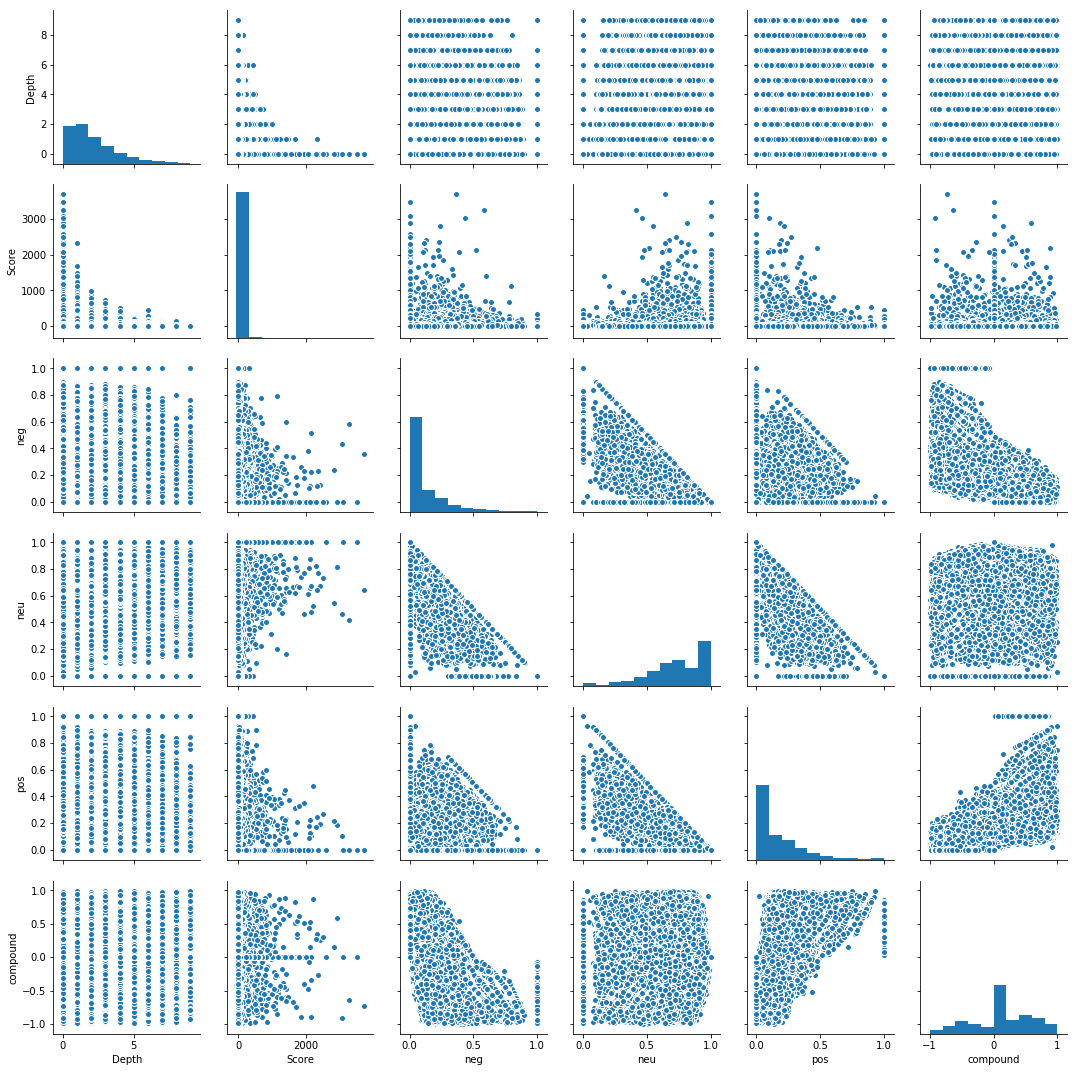

In [138]:
sns.pairplot(df)

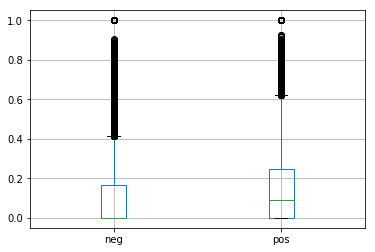

In [144]:
df[['neg','pos']].boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a252cbd30>,
      dtype=object)

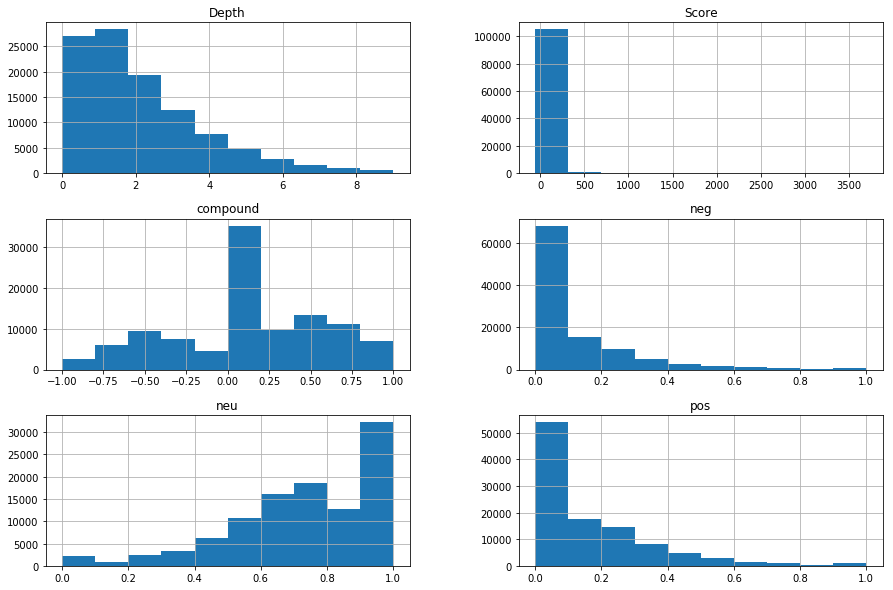

In [155]:
df.hist(figsize=(15,10))

In [158]:
# Split Negative and Positive Comments
negative_comments = df.loc[df['neg'] >= 0.2]
positive_comments = df.loc[df['pos'] >= 0.2]
print(negative_comments.shape)
print(positive_comments.shape)

(21865, 11)
(34175, 11)


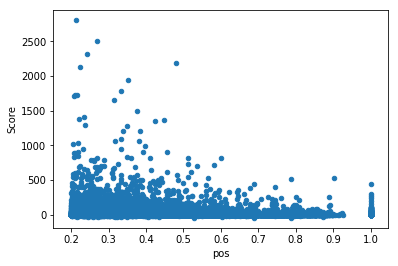

In [173]:
positive_comments.plot(x='pos',y='Score', kind='scatter')

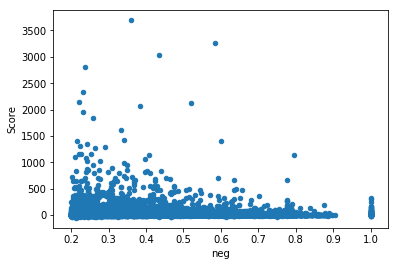

In [175]:
negative_comments.plot(x='neg',y='Score', kind='scatter')

In [180]:
df_first_depth = df.loc[df['Depth'] == 0]

In [196]:
df.loc['t1_cm6qrrb']

Depth                                                         7
Submission    [Post Game Thread] #1 Kentucky defeats #5 Kans...
Username                                              CyBerPike
TeamFlair                                   Iowa State Cyclones
Score                                                        -3
Body                                         Educate yourself. 
ss            {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
neg                                                           0
neu                                                           1
pos                                                           0
compound                                                      0
LogScore                                                    NaN
Name: t1_cm6qrrb, dtype: object

In [206]:
df['LogScorePlus1'] = np.log(df['Score'] + 1)

/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [202]:
df['LogScore'] = df['Score'].apply(np.log)

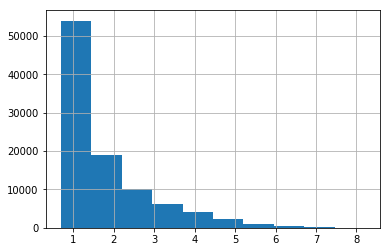

In [214]:
df.loc[df['Score'] > 0]['LogScorePlus1'].hist()

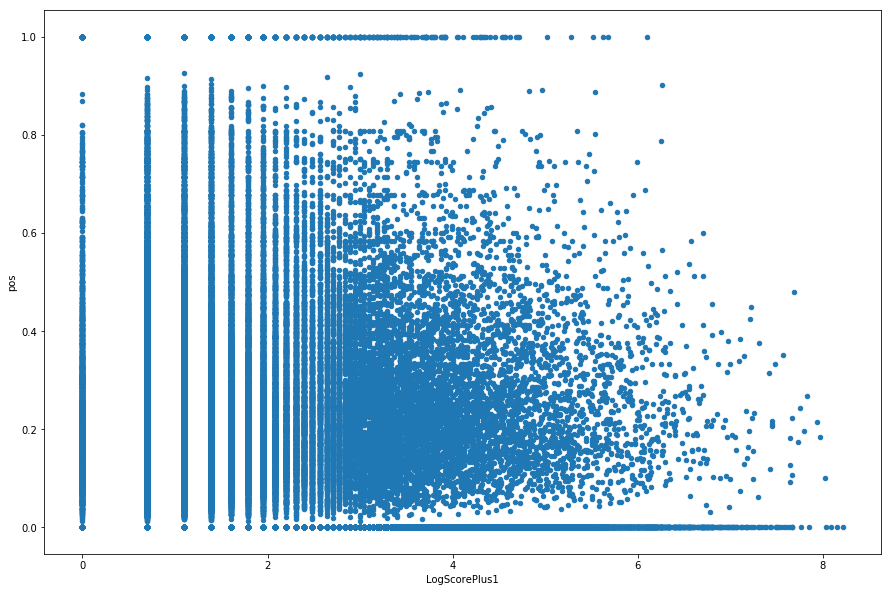

In [217]:
df.plot(x='LogScorePlus1', y='pos', kind='scatter', figsize=(15,10))

/Users/robmulla/anaconda2/envs/w266/lib/python3.6/site-packages/numpy/linalg/linalg.py:1728: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


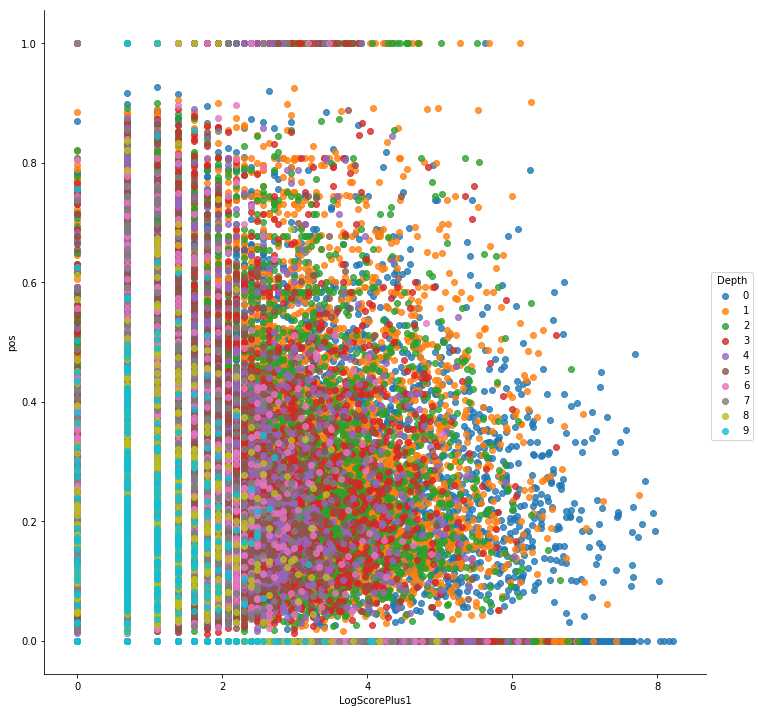

In [226]:
sns.lmplot(x='LogScorePlus1', y='pos', data=df, hue='Depth', size=10)

In [227]:
grouped_depth = df.groupby('Depth')

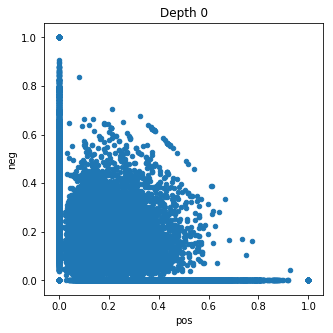

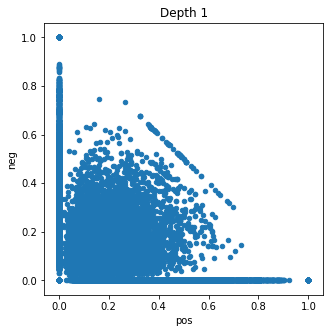

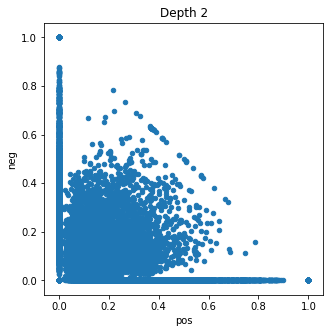

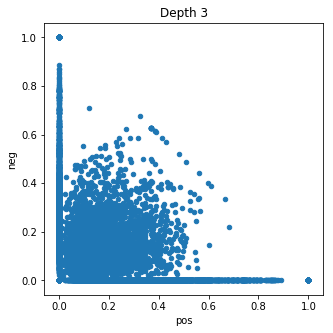

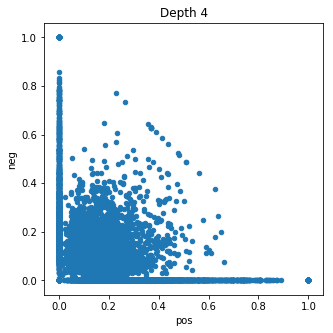

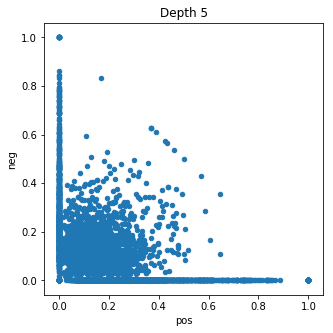

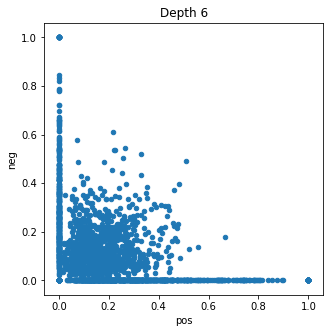

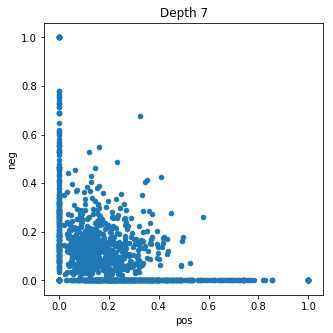

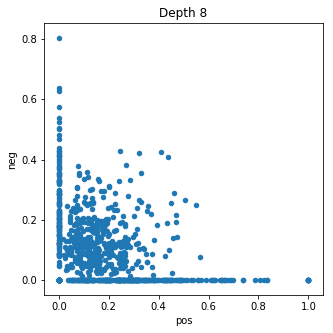

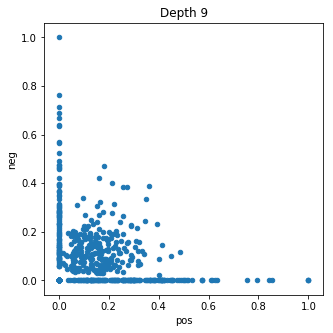

In [233]:
for x, d in grouped_depth:
    d.plot(x='pos', y='neg', kind='scatter', title='Depth {}'.format(x), figsize=(5,5))

# See if Comment Depth correlates to Positive or Negative Comments

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a44c9c9b0>,
      dtype=object)

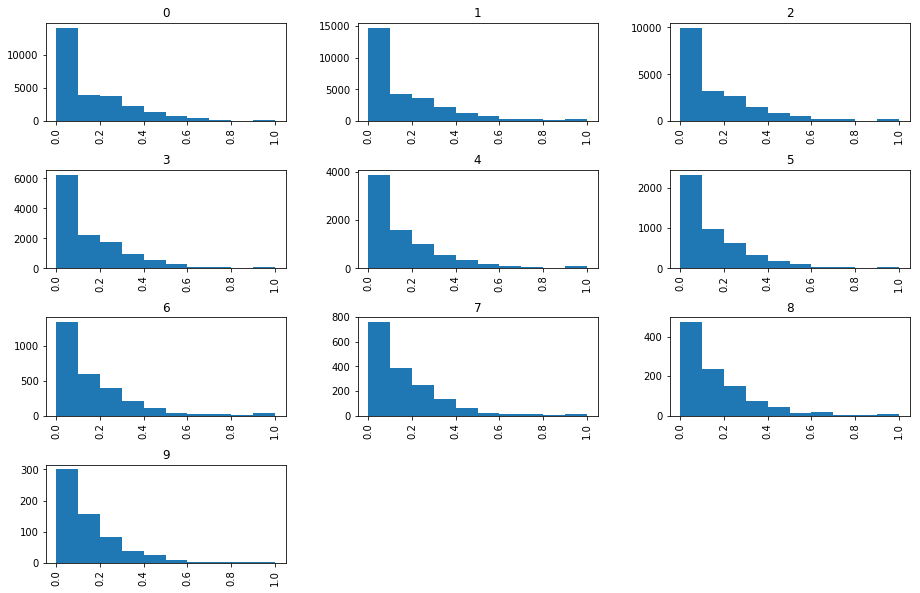

In [247]:
df['pos'].hist(by=df['Depth'], figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a43e59390>,
      dtype=object)

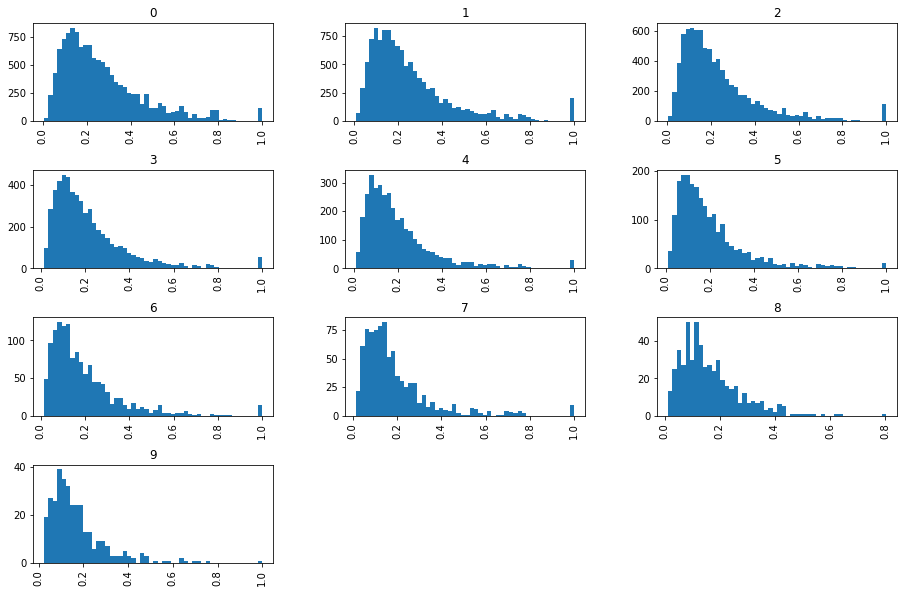

In [250]:
df.loc[df['neg'] > 0]['neg'].hist(by=df['Depth'], figsize=(15,10), bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3fef6cc0>,
      dtype=object)

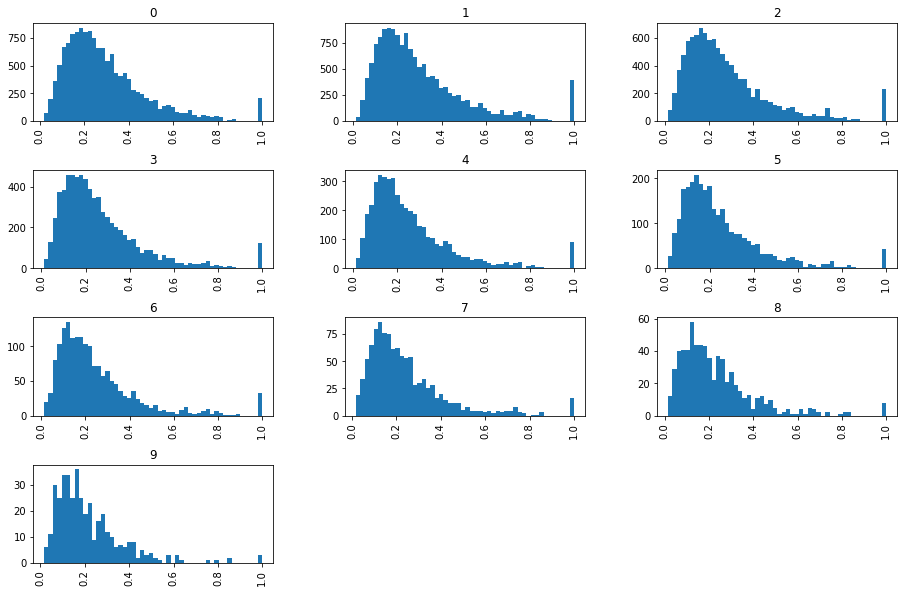

In [251]:
df.loc[df['pos'] > 0]['pos'].hist(by=df['Depth'], figsize=(15,10), bins=50)